\

# **M1 - Assignment 1-4**

## Objective:
Apply unsupervised learning techniques to group the dataset into clusters and uncover hidden structures or patterns within the data.
Tasks:
 * Apply K-means and hierarchical clustering to the dataset. Additionally, build a recommendation engine.
 * Visualize the clustering results using appropriate plots (e.g., 2D/3D scatter plots with clusters).
 * Analyze the clusters and explain what they represent in terms of the data's features.

 * *Optional task: Integrate the clustering results into your Streamlit dashboard, allowing users to explore the different clusters.*

# (From Assignment 1) - Understand Business Context

## (provisional) **BUSINESS PROBLEM:** "Which countries have the greatest need for microloans, and how can we optimize loan allocation based on the different sectors?"

# Section 1: Lib & Data import & merge

In this section, we import the needed libs. Next, import of the partial datasets from Github, merging into one complete...  

In [8]:
#import dataset and libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import requests
import geopandas as gpd
import altair as alt
from vega_datasets import data
import io

#used for gender mapping - section 4
import re

In [9]:
# definition of url-paths for datasets
url1 = 'https://raw.githubusercontent.com/JAdamHub/M1-Exam-Submission/refs/heads/main/kiva_loans_part_0.csv'
url2 = 'https://raw.githubusercontent.com/JAdamHub/M1-Exam-Submission/refs/heads/main/kiva_loans_part_1.csv'
url3 = 'https://raw.githubusercontent.com/JAdamHub/M1-Exam-Submission/refs/heads/main/kiva_loans_part_2.csv'

# loading the urls into requests to download data
print("Downloading data... 1/3")
response1 = requests.get(url1)
print("Downloading data... 2/3")
response2 = requests.get(url2)
print("Downloading data... 3/3")
response3 = requests.get(url3)

# convert the response content to a file-like object for pandas using io.StringIO
# the advantage of StringIO is that it allows us to import the data without having to save it as a file for pandas
data_part1 = pd.read_csv(io.StringIO(response1.text))
data_part2 = pd.read_csv(io.StringIO(response2.text))
data_part3 = pd.read_csv(io.StringIO(response3.text))
print("Data downloaded & imported.")


Data downloaded & imported.



# Section 2: Data Cleaning, Manipulation & Creating Gender Maps

Assess the dataset for quality issues and fix missing values, outliers, and data type inconsistencies. Perform necessary transformations, create new variables, and normalize data if appropriate. If needed, merge data from multiple sources using appropriate joins.

 * Columns dropping
 * Missing Values
 * Checking kurtosis & skew
 * Removing outliers
 * World-map


In [10]:
# We can see, that the imported loan dataset consists of 3 parts. We will like to combine these to one big dataset
data = pd.concat([data_part1, data_part2, data_part3])

In [11]:
# Show the first rows
data.head(10)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01


In [12]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671205 entries, 0 to 221204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-null  in

We can see, that there likely are missing values.. Using isna() to check

In [13]:
#Check to find columns with missing data
data.isna().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

We can see, that alot of data is missing from the tags column. That column is not relevant along with column 'use', since that column consists of alot of qualitative data. As well as 'currency' and 'country_code' And it will be dropped.

In [14]:
data = data.drop(['tags', 'use', 'currency', 'country_code'], axis=1)

Some loans will never be funded - we do not want to delete those. Instead we fill it with 0. Then after we can drop the other missing data...

In [15]:
# Loans never funded
data['funded_time'] = data['funded_time'].where(data['funded_time'].notna(), None)

In [16]:
#Storing length of rows for comparing, >> before dropna.. <<
data_rows = len(data)

#Dropping missing values
data.dropna(inplace=True)

#Storing the now cleaned dataset
cleaned_rows = len(data)

#Check..
drops = data_rows - cleaned_rows

print(f"Number of dropped rows: {drops}")
print(f'In percentage {(drops / data_rows) * 100:.2f} % of the data was removed')

Number of dropped rows: 97078
In percentage 14.46 % of the data was removed


In [17]:
# New data info after cleaning (dropna)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574127 entries, 0 to 221186
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  574127 non-null  int64  
 1   funded_amount       574127 non-null  float64
 2   loan_amount         574127 non-null  float64
 3   activity            574127 non-null  object 
 4   sector              574127 non-null  object 
 5   country             574127 non-null  object 
 6   region              574127 non-null  object 
 7   partner_id          574127 non-null  float64
 8   posted_time         574127 non-null  object 
 9   disbursed_time      574127 non-null  object 
 10  funded_time         574127 non-null  object 
 11  term_in_months      574127 non-null  float64
 12  lender_count        574127 non-null  int64  
 13  borrower_genders    574127 non-null  object 
 14  repayment_interval  574127 non-null  object 
 15  date                574127 non-null  ob

### kurtosis and skew




In [18]:
print(data['loan_amount'].kurtosis())
print(data['loan_amount'].skew())

495.36473761372037
12.149114651229462


### Removing outliers of the sample as a whole



Text(0.5, 1.0, 'Box Plot of Passenger loan_amount')

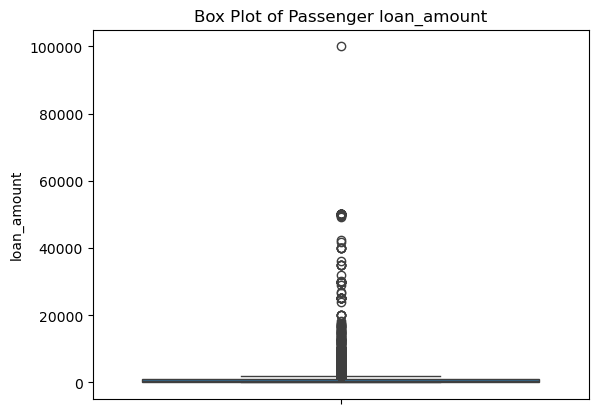

In [19]:
sns.boxplot(data=data, y='loan_amount').set_title('Box Plot of Passenger loan_amount')

In [20]:
# Calculate Z-scores
z_scores = zscore(data['loan_amount'])

# Get boolean array indicating the presence of outliers
# Using 2 & -2 z_scores to get 95% of data within 2 standard deviations
data['outlier_loan_amount'] = (z_scores > 2) | (z_scores < -2)


#Removing outliers
data_clean = data[~data['outlier_loan_amount']]

# Check amount of outliers (if any?)
data['outlier_loan_amount'].sum()

23129

In [21]:
print(data_clean['loan_amount'].kurtosis())
print(data_clean['loan_amount'].skew())

3.26098901564175
1.75684104358664


Text(0.5, 1.0, 'Box Plot of Passenger loan_amount')

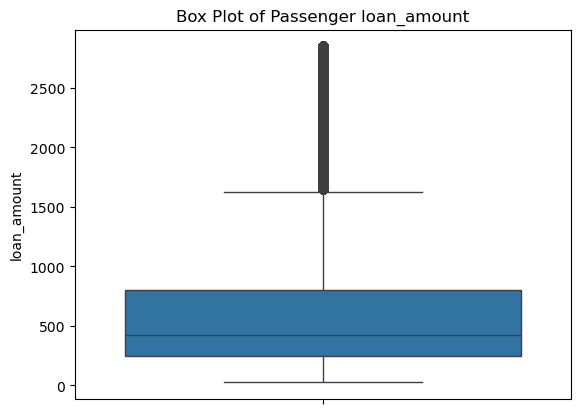

In [22]:
# Boxplot check after removal of outliers
sns.boxplot(data=data_clean, y='loan_amount').set_title('Box Plot of Passenger loan_amount')

# Section 3: (**Assignment 1:** Descriptive Statistics)

Calculate basic statistics for key variables (mean, median, variance, etc.). Explore data distributions with histograms, box plots, and density plots.

/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykernel_32414/3134581649.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_clean['funded_amount'], label='funded_amount', shade=True).set_title('funded_amount')


Text(0.5, 1.0, 'funded_amount')

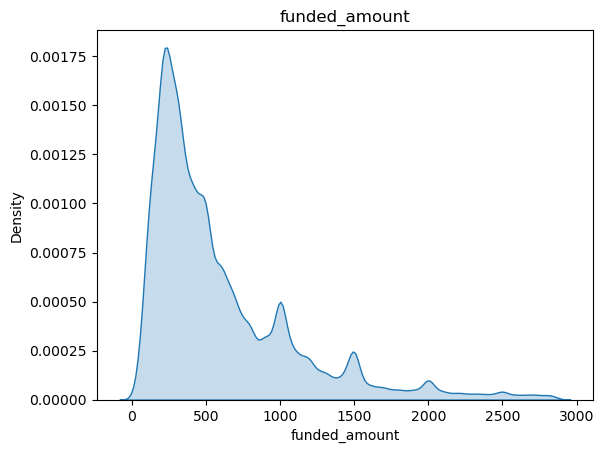

In [23]:
sns.kdeplot(data_clean['funded_amount'], label='funded_amount', shade=True).set_title('funded_amount')

In [24]:
# Description of cleaned data
data_clean[['loan_amount', 'funded_amount', 'term_in_months']].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amount,550998.0,601.934490,507.332615,25.0,250.0,425.0,800.0,2850.0
funded_amount,550998.0,601.934490,507.332615,25.0,250.0,425.0,800.0,2850.0
term_in_months,550998.0,13.407176,8.139459,2.0,8.0,13.0,14.0,141.0


### Top 10 countries, funded amount

In [25]:
# What is the total amount of loan_amount for each country?
country_loans = data_clean.groupby('country')['loan_amount'].sum()

# We would like a classic top 10 to get an overview of the
country_top_10 = country_loans.sort_values(ascending=False).head(10)

print(country_top_10)

country
Philippines    53296250.0
Kenya          26560750.0
Cambodia       17734975.0
Peru           16879250.0
Ecuador        12079400.0
Tajikistan     11988550.0
Uganda         11594500.0
Pakistan       11581200.0
El Salvador    10657050.0
Vietnam         9887975.0
Name: loan_amount, dtype: float64


In [26]:
data_top_10 = data_clean[data_clean['country'].isin(country_top_10.index)]

data_top_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369060 entries, 0 to 221170
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   369060 non-null  int64  
 1   funded_amount        369060 non-null  float64
 2   loan_amount          369060 non-null  float64
 3   activity             369060 non-null  object 
 4   sector               369060 non-null  object 
 5   country              369060 non-null  object 
 6   region               369060 non-null  object 
 7   partner_id           369060 non-null  float64
 8   posted_time          369060 non-null  object 
 9   disbursed_time       369060 non-null  object 
 10  funded_time          369060 non-null  object 
 11  term_in_months       369060 non-null  float64
 12  lender_count         369060 non-null  int64  
 13  borrower_genders     369060 non-null  object 
 14  repayment_interval   369060 non-null  object 
 15  date                 3

/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykernel_32414/1787005763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_top_10.index, y=country_top_10.values, palette="viridis")


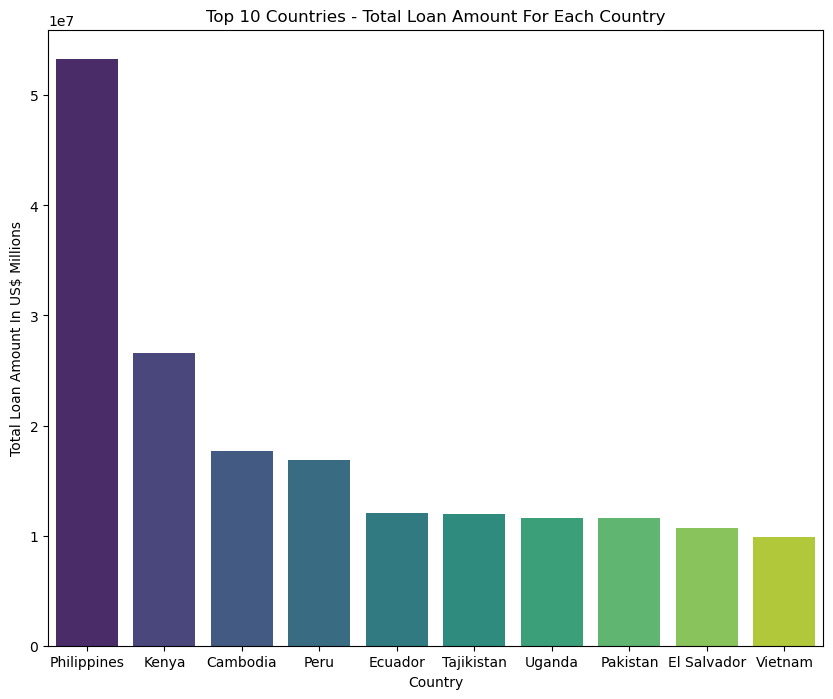

In [27]:
plt.figure(figsize=(10, 8))
sns.barplot(x=country_top_10.index, y=country_top_10.values, palette="viridis")
plt.title('Top 10 Countries - Total Loan Amount For Each Country')
plt.xlabel('Country')
plt.ylabel('Total Loan Amount In US$ Millions')  # managed to add labels (J)
plt.show()

We would like to get the percentage of total loan amount among the top 10 countries

In [28]:
# We need to sum all numbers first
total_sum = country_top_10.sum()

# Then we can calculate the percentage
country_top_10_pct = (country_top_10 / total_sum) * 100 # Calculate percentages

# We create pandas df for presentation
result_df = pd.DataFrame({'Country': country_top_10_pct.index, 'percentage': country_top_10_pct.values})

# Results:

result_df

,Country,percentage
0,Philippines,29.241896
1,Kenya,14.573008
2,Cambodia,9.730596
3,Peru,9.261088
4,Ecuador,6.627569
5,Tajikistan,6.577722
6,Uganda,6.361520
7,Pakistan,6.354223
8,El Salvador,5.847172
9,Vietnam,5.425206


## Correlation matrix

To check linear relationship regarding pairs of variables

In [29]:
correlation_data = data_top_10[['funded_amount', 'loan_amount', 'lender_count', 'term_in_months', 'partner_id']]

correlation_matrix = correlation_data.corr(method='spearman')

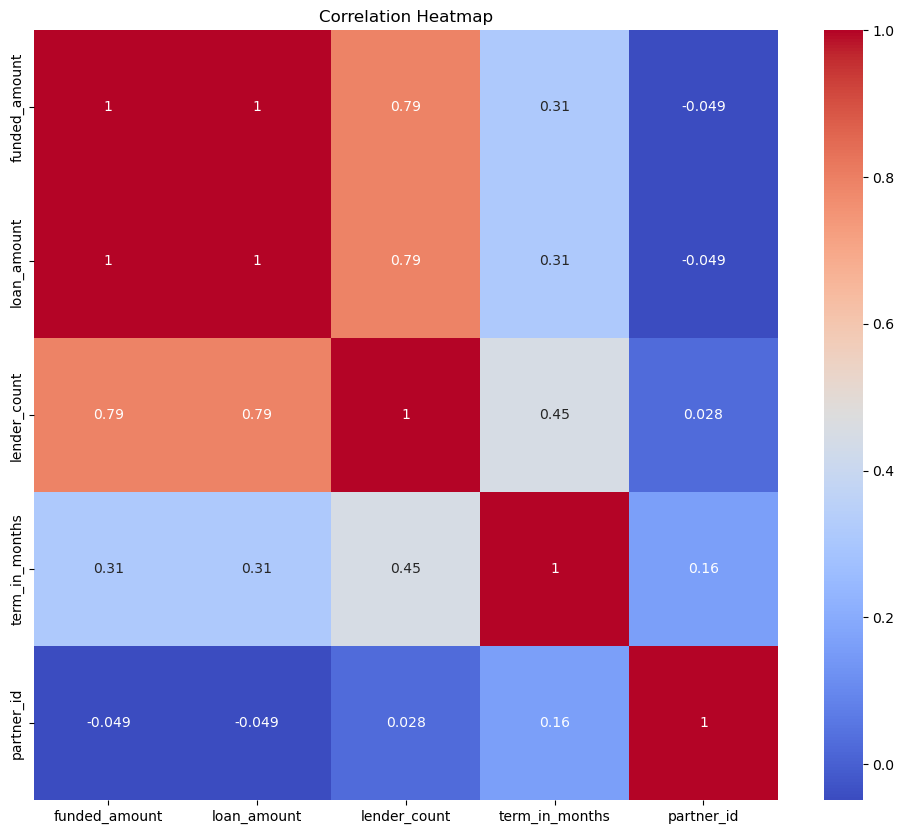

In [30]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Section 4: Exploratory Data Analysis (EDA) and Visualization

Conduct thorough EDA of your chosen dataset. Create insightful visualizations—avoid trivial visuals like pie charts. Focus on revealing key insights

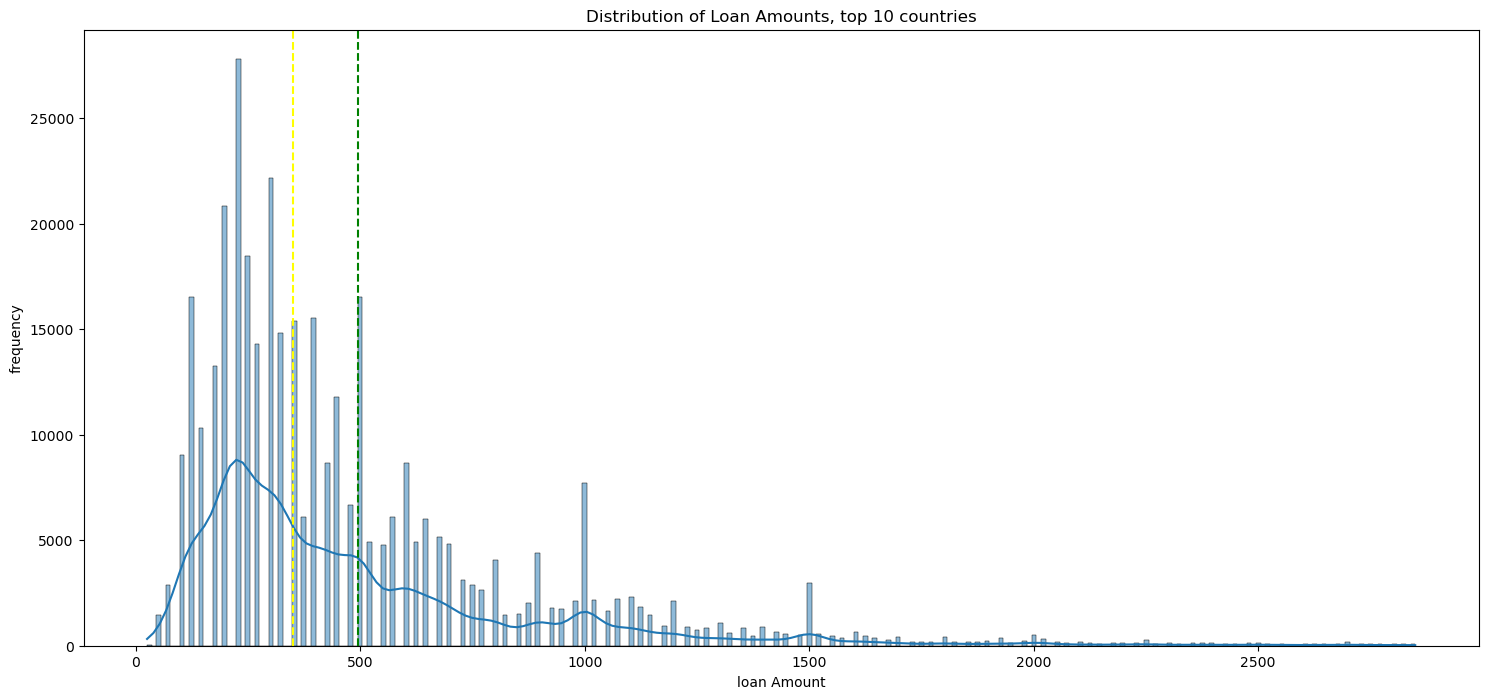

YELLOW LINE: Average loan amount: $493.85
 GREEN LINE: Median loan amount: $350.00


In [31]:
# Define of median and mean
mean_loan = data_top_10['loan_amount'].median()
median_loan = data_top_10['loan_amount'].mean()

# Distribution plot
plt.figure(figsize=(18, 8))
sns.histplot(data_top_10, x='loan_amount', kde=True)
plt.title('Distribution of Loan Amounts, top 10 countries')
plt.axvline(mean_loan, color='yellow', linestyle='--')
plt.axvline(median_loan, color='green', linestyle='--')
plt.xlabel('loan Amount')
plt.ylabel('frequency')
plt.show()

print(f"YELLOW LINE: Average loan amount: ${data_top_10['loan_amount'].mean():.2f}")
print(f" GREEN LINE: Median loan amount: ${data_top_10['loan_amount'].median():.2f}")

#:.2f} tells python to use 2 decimals

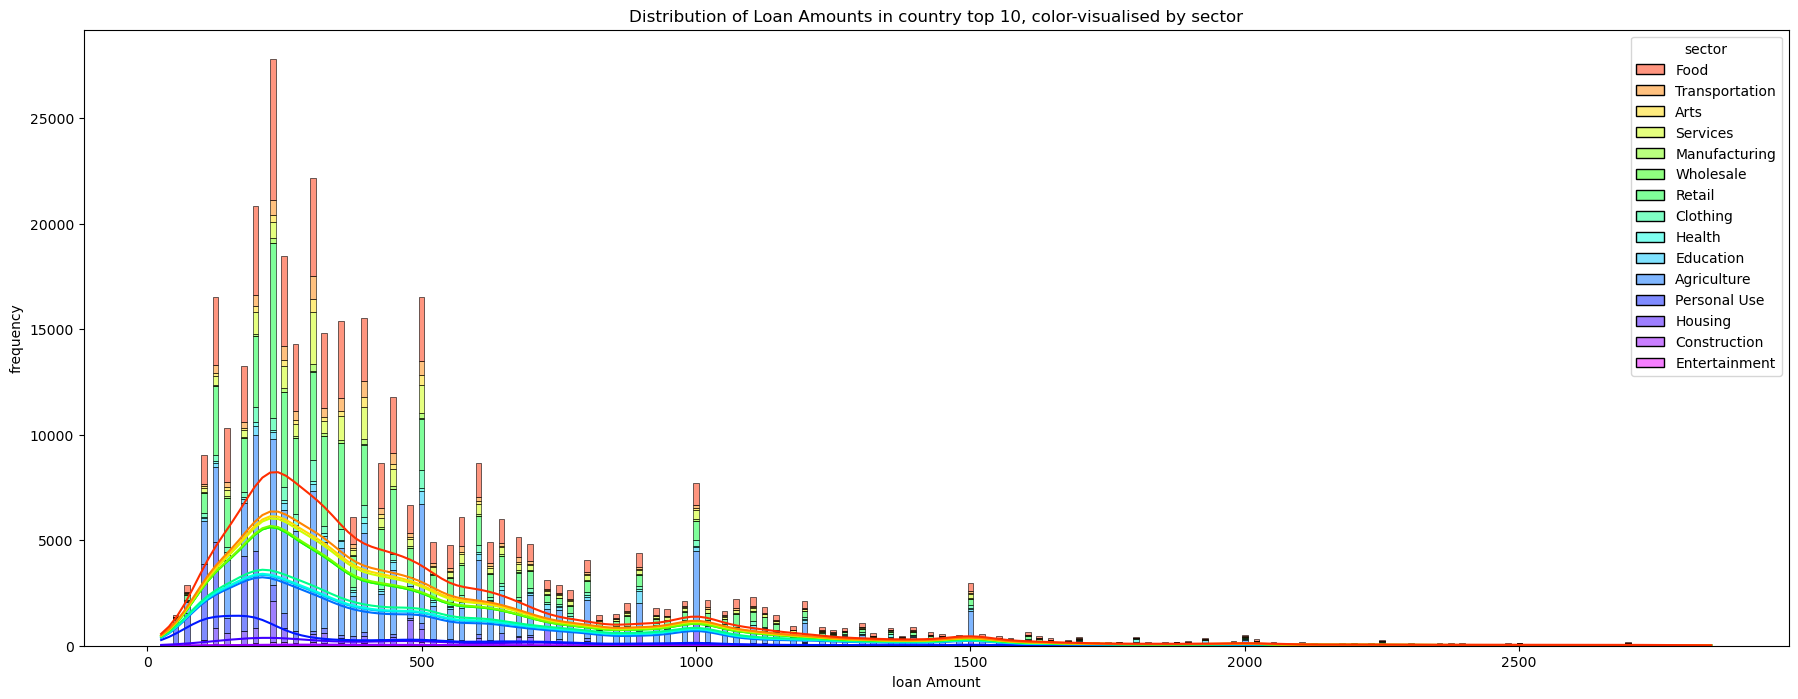

In [32]:
# It's interesting to check the different sectors in top 10

plt.figure(figsize=(22, 8))
sns.histplot(data_top_10, x='loan_amount', hue='sector', multiple='stack', kde=True, palette='gist_rainbow')
plt.title('Distribution of Loan Amounts in country top 10, color-visualised by sector')
plt.xlabel('loan Amount')
plt.ylabel('frequency')
plt.show()

In [33]:
sector_stat = data_top_10.groupby('sector')['loan_amount'].agg(['mean', 'median'])
print(sector_stat)

                      mean  median
sector                            
Agriculture     550.941949   400.0
Arts            491.769512   400.0
Clothing        569.470656   450.0
Construction    584.873157   475.0
Education       756.106568   600.0
Entertainment   563.050847   475.0
Food            464.349183   350.0
Health          660.701374   500.0
Housing         519.570699   450.0
Manufacturing   550.309556   425.0
Personal Use    247.471575   175.0
Retail          442.021720   325.0
Services        515.795556   400.0
Transportation  463.204802   375.0
Wholesale       732.899023   575.0


In [34]:
sector_stat = data_top_10.groupby('sector')['loan_amount'].describe().T
print(sector_stat)

sector    Agriculture         Arts      Clothing  Construction     Education  \
count   108870.000000  5753.000000  12081.000000   2917.000000  11983.000000   
mean       550.941949   491.769512    569.470656    584.873157    756.106568   
std        423.383278   390.470809    423.350240    413.019803    546.455440   
min         25.000000    50.000000     25.000000     50.000000     25.000000   
25%        250.000000   275.000000    275.000000    275.000000    350.000000   
50%        400.000000   400.000000    450.000000    475.000000    600.000000   
75%        700.000000   550.000000    750.000000    775.000000    975.000000   
max       2850.000000  2850.000000   2850.000000   2775.000000   2850.000000   

sector  Entertainment          Food       Health       Housing  Manufacturing  \
count      295.000000  73884.000000  4149.000000  15269.000000    3715.000000   
mean       563.050847    464.349183   660.701374    519.570699     550.309556   
std        366.124000    383.899798 

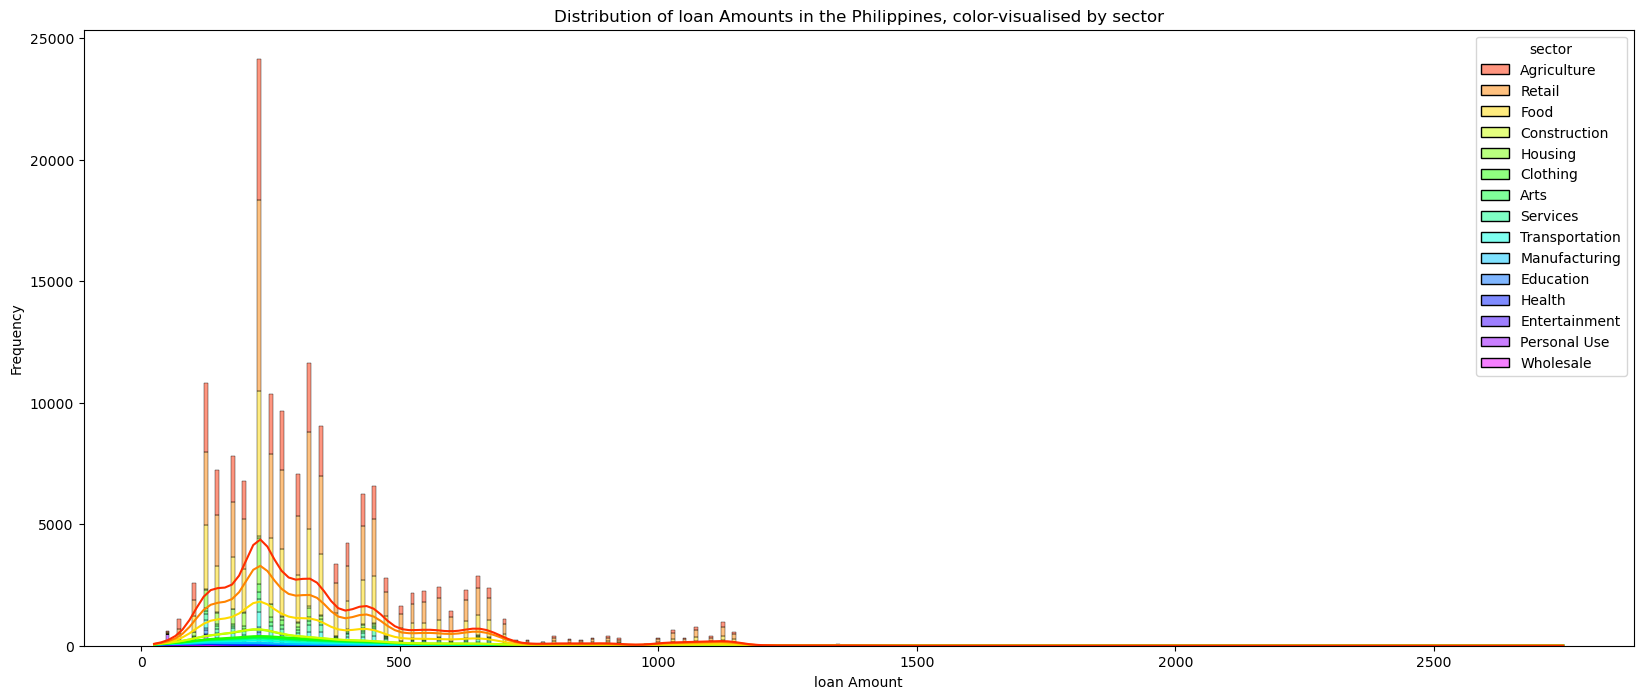

In [35]:
# Philippines filter
philippines_data = data_top_10[data_top_10['country'] == 'Philippines']

# Plot
plt.figure(figsize=(20, 8))
sns.histplot(philippines_data, x='loan_amount', hue='sector', multiple='stack', kde=True, palette='gist_rainbow')
plt.title('Distribution of loan Amounts in the Philippines, color-visualised by sector')
plt.xlabel('loan Amount')
plt.ylabel('Frequency')
plt.show()

In [36]:
philippines_sector_stats = philippines_data.groupby('sector')['loan_amount'].describe().T

print("Philipinnes only:")
print(philippines_sector_stats)

Philipinnes only:
sector   Agriculture         Arts     Clothing  Construction    Education  \
count   36425.000000  1990.000000  2701.000000    788.000000  1717.000000   
mean      320.310913   292.537688   385.986672    413.134518   307.979033   
std       192.436417   143.236901   236.644831    248.720507   208.246281   
min        25.000000    75.000000    50.000000     75.000000    50.000000   
25%       200.000000   200.000000   225.000000    225.000000   175.000000   
50%       275.000000   275.000000   325.000000    325.000000   250.000000   
75%       375.000000   350.000000   450.000000    525.000000   400.000000   
max      2425.000000  1375.000000  2750.000000   1500.000000  2275.000000   

sector  Entertainment          Food       Health      Housing  Manufacturing  \
count      139.000000  42001.000000   625.000000  6579.000000    1439.000000   
mean       448.021583    341.407943   455.880000   263.220094     367.373176   
std        234.251521    197.425165   281.131431

In [37]:
data_top_10

,id,funded_amount,loan_amount,activity,sector,country,region,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,outlier_loan_amount
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,female,irregular,2014-01-01,False
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,"female, female",irregular,2014-01-01,False
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,female,irregular,2014-01-01,False
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,female,monthly,2014-01-01,False
7,653078,400.0,400.0,Beauty Salon,Services,Pakistan,Ellahabad,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,female,monthly,2014-01-01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221133,1338878,475.0,475.0,Higher education costs,Education,Tajikistan,Dushanbe,63.0,2017-07-13 06:38:39+00:00,2017-07-11 07:00:00+00:00,2017-07-16 04:29:11+00:00,14.0,12,female,monthly,2017-07-13,False
221141,1339713,175.0,175.0,Sewing,Services,Tajikistan,Hamadoni,63.0,2017-07-14 05:27:46+00:00,2017-07-05 07:00:00+00:00,2017-07-14 19:10:26+00:00,14.0,5,female,monthly,2017-07-14,False
221152,1340239,25.0,25.0,Livestock,Agriculture,Pakistan,Attock,245.0,2017-07-20 22:03:15+00:00,2017-07-20 07:00:00+00:00,2017-07-22 00:53:41+00:00,13.0,1,female,monthly,2017-07-20,False
221164,1340256,25.0,25.0,Livestock,Agriculture,Pakistan,Attock,245.0,2017-07-21 15:16:37+00:00,2017-07-21 07:00:00+00:00,2017-07-22 01:23:18+00:00,13.0,1,female,monthly,2017-07-21,False


/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykernel_32414/3042502294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_loans_by_country.index, y=average_loans_by_country.values, palette='viridis')


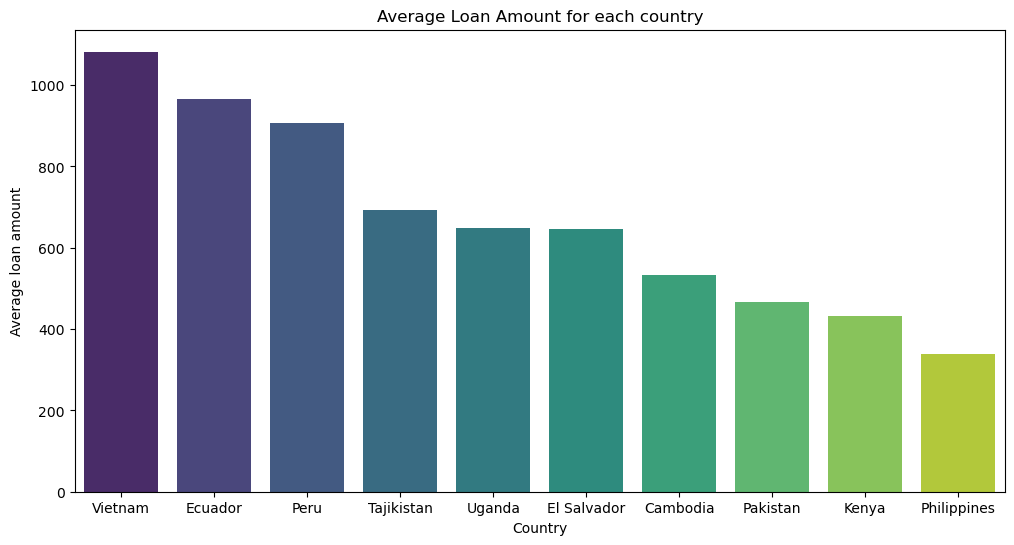

In [38]:
# Average loan amount for each top 10 country
average_loans_by_country = data_top_10.groupby('country')['loan_amount'].mean()

# Sort the countries (high to low)
average_loans_by_country = average_loans_by_country.sort_values(ascending=False)

# Lav et barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_loans_by_country.index, y=average_loans_by_country.values, palette='viridis')
plt.title('Average Loan Amount for each country')
plt.xlabel('Country')
plt.ylabel('Average loan amount')
plt.show()

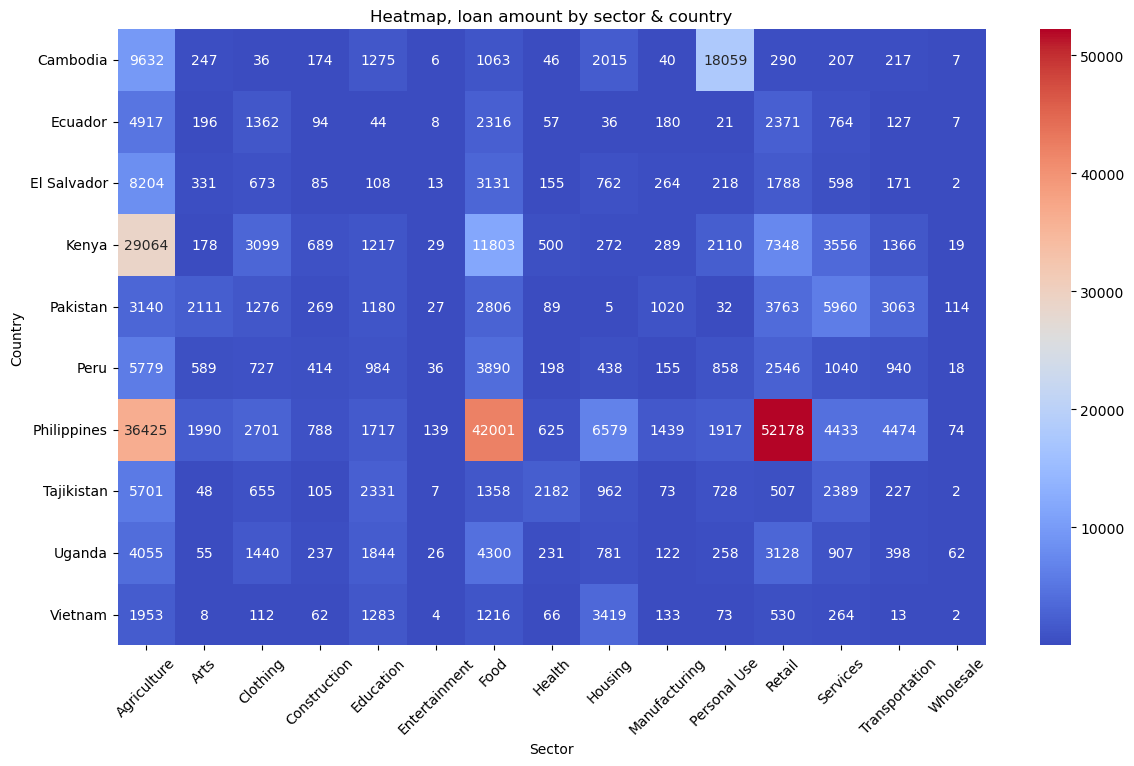

In [39]:
# Create a pivot table for the heatmap
outcome_heatmap_data = data_top_10.pivot_table(index='country', columns='sector', values='loan_amount', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(outcome_heatmap_data, annot=True, fmt="d", cmap="coolwarm")

# Set titles and labels
plt.title('Heatmap, loan amount by sector & country')
plt.xlabel('Sector')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykernel_32414/2154698170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_10['funded_time'] = pd.to_datetime(data_top_10['funded_time'])
/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykernel_32414/2154698170.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  funded_trend = data_top_10.resample('M').size()


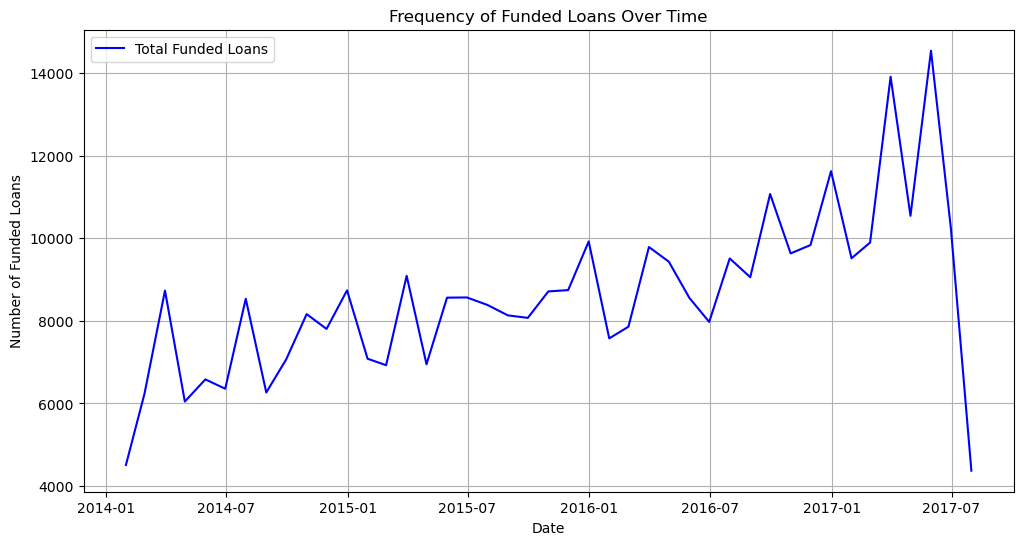

In [40]:
#use pandas to ensure that 'funded_time' is in a datetime format
data_top_10['funded_time'] = pd.to_datetime(data_top_10['funded_time'])

#set the date column as the index
data_top_10.set_index('funded_time', inplace=True)

#resample the data to a monthly frequency (can also be yearly, daily, etc.)
funded_trend = data_top_10.resample('M').size()

#plot the frequency of searches over time
plt.figure(figsize=(12, 6))
plt.plot(funded_trend, label='Total Funded Loans', color='blue')

#reset index to ensure "funded_time" returns back as a column in the dataframe
data_top_10.reset_index(inplace=True)

#add labels and title
plt.title('Frequency of Funded Loans Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Funded Loans')
plt.legend()
plt.grid(True)
plt.show()

# Section 5: Gender Mapping (Used for **Assignment 2:** Streamlit deployment)

Lambda + re.findall is used to find males & females in the gender column.

New columns are created to calculate the ratio of male & female borrowers for each row

Based on the ratio, rows gets sorted into three different groups in the new gender_class column: female group, male group & mixed group.

In [41]:
male = data_clean[data_clean['borrower_genders'] == 'male']
female = data_clean[data_clean['borrower_genders'] == 'female']
print ('Total Male loans',male.shape[0])
print ('Total Female loans',female.shape[0])

Total Male loans 101344
Total Female loans 374745


In [42]:
loans = data_clean

# Tæl antallet af mandlige og kvindelige låntagere
loans['male_borrowers'] = loans['borrower_genders'].apply(lambda x: len(re.findall(r'\bmale', x)))
loans['female_borrowers'] = loans['borrower_genders'].apply(lambda x: len(re.findall(r'\bfemale', x)))

# Beregn det samlede antal låntagere
loans['borrowers_count'] = loans['male_borrowers'] + loans['female_borrowers']

# Håndter situationer, hvor 'borrowers_count' er 0 for at undgå division med 0
loans['male_borrower_ratio'] = loans['male_borrowers'] / loans['borrowers_count'].replace(0, 1)

# Funktion til at klassificere køn baseret på ratio
def classify_genders(ratio):
    if ratio == 1:
        return 'male(s)'
    elif ratio == 0:
        return 'female(s)'
    else:
        return 'mixed gender group'

# Anvend kønsklassifikationen
loans['gender_class'] = loans['male_borrower_ratio'].apply(classify_genders)

# Udskriv resultatet
print(loans[['borrower_genders', 'male_borrowers', 'female_borrowers', 'borrowers_count', 'male_borrower_ratio', 'gender_class']])

loans

/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykernel_32414/751837621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['male_borrowers'] = loans['borrower_genders'].apply(lambda x: len(re.findall(r'\bmale', x)))
/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykernel_32414/751837621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['female_borrowers'] = loans['borrower_genders'].apply(lambda x: len(re.findall(r'\bfemale', x)))
/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykern

       borrower_genders  male_borrowers  female_borrowers  borrowers_count  \
0                female               0                 1                1   
1        female, female               0                 2                2   
2                female               0                 1                1   
3                female               0                 1                1   
4                female               0                 1                1   
...                 ...             ...               ...              ...   
221157           female               0                 1                1   
221163           female               0                 1                1   
221164           female               0                 1                1   
221170           female               0                 1                1   
221186           female               0                 1                1   

        male_borrower_ratio gender_class  
0                   

,id,funded_amount,loan_amount,activity,sector,country,region,partner_id,posted_time,disbursed_time,...,lender_count,borrower_genders,repayment_interval,date,outlier_loan_amount,male_borrowers,female_borrowers,borrowers_count,male_borrower_ratio,gender_class
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,...,12,female,irregular,2014-01-01,False,0,1,1,0.0,female(s)
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,...,14,"female, female",irregular,2014-01-01,False,0,2,2,0.0,female(s)
2,653068,150.0,150.0,Transportation,Transportation,India,Maynaguri,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,...,6,female,bullet,2014-01-01,False,0,1,1,0.0,female(s)
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,...,8,female,irregular,2014-01-01,False,0,1,1,0.0,female(s)
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,...,16,female,monthly,2014-01-01,False,0,1,1,0.0,female(s)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221157,1340272,75.0,75.0,Livestock,Agriculture,Mexico,Iztacalco,294.0,2017-07-21 23:00:01+00:00,2017-07-21 07:00:00+00:00,...,3,female,monthly,2017-07-21,False,0,1,1,0.0,female(s)
221163,1340253,25.0,25.0,Livestock,Agriculture,Paraguay,Concepción,58.0,2017-07-21 07:05:51+00:00,2017-07-21 07:00:00+00:00,...,1,female,monthly,2017-07-21,False,0,1,1,0.0,female(s)
221164,1340256,25.0,25.0,Livestock,Agriculture,Pakistan,Attock,245.0,2017-07-21 15:16:37+00:00,2017-07-21 07:00:00+00:00,...,1,female,monthly,2017-07-21,False,0,1,1,0.0,female(s)
221170,1340267,25.0,25.0,Livestock,Agriculture,Pakistan,Attock,245.0,2017-07-21 21:46:10+00:00,2017-07-21 07:00:00+00:00,...,1,female,monthly,2017-07-21,False,0,1,1,0.0,female(s)


In [43]:
loans.gender_class.value_counts()

gender_class
female(s)             419487
male(s)               104143
mixed gender group     27368
Name: count, dtype: int64

# Section 6: **Assignment 3:** PCA, UMAP, Clustering
## Objective:
Apply unsupervised learning techniques to group the dataset into clusters and uncover hidden structures or patterns within the data.
Tasks:
 * Apply K-means and hierarchical clustering to the dataset. Additionally, build a recommendation engine.
 * Visualize the clustering results using appropriate plots (e.g., 2D/3D scatter plots with clusters).
 * Analyze the clusters and explain what they represent in terms of the data's features.

 * *Optional task: Integrate the clustering results into your Streamlit dashboard, allowing users to explore the different clusters.*

In [44]:
# import new libs

#umap
!pip install umap-learn -q
import umap

#sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel #to be removed? :)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score #to be removed? :)

from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage

## Pre-processing data for UML



In [45]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550998 entries, 0 to 221186
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   550998 non-null  int64  
 1   funded_amount        550998 non-null  float64
 2   loan_amount          550998 non-null  float64
 3   activity             550998 non-null  object 
 4   sector               550998 non-null  object 
 5   country              550998 non-null  object 
 6   region               550998 non-null  object 
 7   partner_id           550998 non-null  float64
 8   posted_time          550998 non-null  object 
 9   disbursed_time       550998 non-null  object 
 10  funded_time          550998 non-null  object 
 11  term_in_months       550998 non-null  float64
 12  lender_count         550998 non-null  int64  
 13  borrower_genders     550998 non-null  object 
 14  repayment_interval   550998 non-null  object 
 15  date                 5

In [46]:
loans.head(15)

,id,funded_amount,loan_amount,activity,sector,country,region,partner_id,posted_time,disbursed_time,...,lender_count,borrower_genders,repayment_interval,date,outlier_loan_amount,male_borrowers,female_borrowers,borrowers_count,male_borrower_ratio,gender_class
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,...,12,female,irregular,2014-01-01,False,0,1,1,0.0,female(s)
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,...,14,"female, female",irregular,2014-01-01,False,0,2,2,0.0,female(s)
2,653068,150.0,150.0,Transportation,Transportation,India,Maynaguri,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,...,6,female,bullet,2014-01-01,False,0,1,1,0.0,female(s)
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,...,8,female,irregular,2014-01-01,False,0,1,1,0.0,female(s)
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,...,16,female,monthly,2014-01-01,False,0,1,1,0.0,female(s)
6,653067,200.0,200.0,Dairy,Agriculture,India,Maynaguri,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,...,8,female,bullet,2014-01-01,False,0,1,1,0.0,female(s)
7,653078,400.0,400.0,Beauty Salon,Services,Pakistan,Ellahabad,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,...,8,female,monthly,2014-01-01,False,0,1,1,0.0,female(s)
8,653082,475.0,475.0,Manufacturing,Manufacturing,Pakistan,Lahore,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,...,19,female,monthly,2014-01-01,False,0,1,1,0.0,female(s)
9,653048,625.0,625.0,Food Production/Sales,Food,Pakistan,Lahore,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,...,24,female,irregular,2014-01-01,False,0,1,1,0.0,female(s)
10,653060,200.0,200.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,2014-01-01 07:32:39+00:00,2013-12-24 08:00:00+00:00,...,3,female,irregular,2014-01-01,False,0,1,1,0.0,female(s)


Remember to include the time between posted_time & funded_time

In [47]:
# We would like to also include the time/duration between posted_time and funded_time - in other words: how long it takes to get a loan funded
# convert to pd.datetime
loans['posted_time'] = pd.to_datetime(loans['posted_time'])
loans['funded_time'] = pd.to_datetime(loans['funded_time'])

# calculate time between posted_time and funded_time
loans['funding_duration'] = loans['funded_time'] - loans['posted_time']

# the result in days instead
loans['funding_duration_days'] = (loans['funded_time'] - loans['posted_time']).dt.total_seconds() / (24 * 60 * 60)

# first rows to check
loans[['posted_time', 'funded_time', 'funding_duration', 'funding_duration_days']].head()

/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykernel_32414/1345356496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['posted_time'] = pd.to_datetime(loans['posted_time'])
/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykernel_32414/1345356496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['funded_time'] = pd.to_datetime(loans['funded_time'])
/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykernel_32414/1345356496.py:7: SettingWithCopyWarning: 
A value is trying to be set o

,posted_time,funded_time,funding_duration,funding_duration_days
0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,1 days 03:53:53,1.162419
1,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,1 days 02:26:15,1.101562
2,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,0 days 06:03:29,0.252419
3,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,0 days 04:56:49,0.206123
4,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,0 days 07:25:32,0.309398


In [48]:
loans[['posted_time', 'funded_time', 'funding_duration', 'funding_duration_days']].head()

,posted_time,funded_time,funding_duration,funding_duration_days
0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,1 days 03:53:53,1.162419
1,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,1 days 02:26:15,1.101562
2,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,0 days 06:03:29,0.252419
3,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,0 days 04:56:49,0.206123
4,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,0 days 07:25:32,0.309398


In [49]:
# For the clustering, we would like to only select the numerical features
data_to_cluster = loans[['funded_amount', 'loan_amount', 'lender_count', 'male_borrowers', 'female_borrowers', 'borrowers_count', 'funding_duration_days']]

data_to_cluster

,funded_amount,loan_amount,lender_count,male_borrowers,female_borrowers,borrowers_count,funding_duration_days
0,300.0,300.0,12,0,1,1,1.162419
1,575.0,575.0,14,0,2,2,1.101562
2,150.0,150.0,6,0,1,1,0.252419
3,200.0,200.0,8,0,1,1,0.206123
4,400.0,400.0,16,0,1,1,0.309398
...,...,...,...,...,...,...,...
221157,75.0,75.0,3,0,1,1,0.576875
221163,25.0,25.0,1,0,1,1,3.737975
221164,25.0,25.0,1,0,1,1,0.421308
221170,25.0,25.0,1,0,1,1,0.639803


In [50]:
# From : sklearn.preprocessing import StandardScaler below - imported at section 1
scaler = StandardScaler()
data_to_cluster_scaled = scaler.fit_transform(data_to_cluster)

In [51]:
# Min-Max scaling as well:
scaler_min_max = MinMaxScaler()

In [52]:
# Transforming min & max scaling
data_to_cluster_minmax = scaler_min_max.fit_transform(data_to_cluster)

Need to fix funded_amount - standardise

In [53]:
# Showcase of numerical values:
data_to_cluster

,funded_amount,loan_amount,lender_count,male_borrowers,female_borrowers,borrowers_count,funding_duration_days
0,300.0,300.0,12,0,1,1,1.162419
1,575.0,575.0,14,0,2,2,1.101562
2,150.0,150.0,6,0,1,1,0.252419
3,200.0,200.0,8,0,1,1,0.206123
4,400.0,400.0,16,0,1,1,0.309398
...,...,...,...,...,...,...,...
221157,75.0,75.0,3,0,1,1,0.576875
221163,25.0,25.0,1,0,1,1,3.737975
221164,25.0,25.0,1,0,1,1,0.421308
221170,25.0,25.0,1,0,1,1,0.639803


In [54]:
data_to_cluster.isna().sum()

funded_amount            0
loan_amount              0
lender_count             0
male_borrowers           0
female_borrowers         0
borrowers_count          0
funding_duration_days    0
dtype: int64

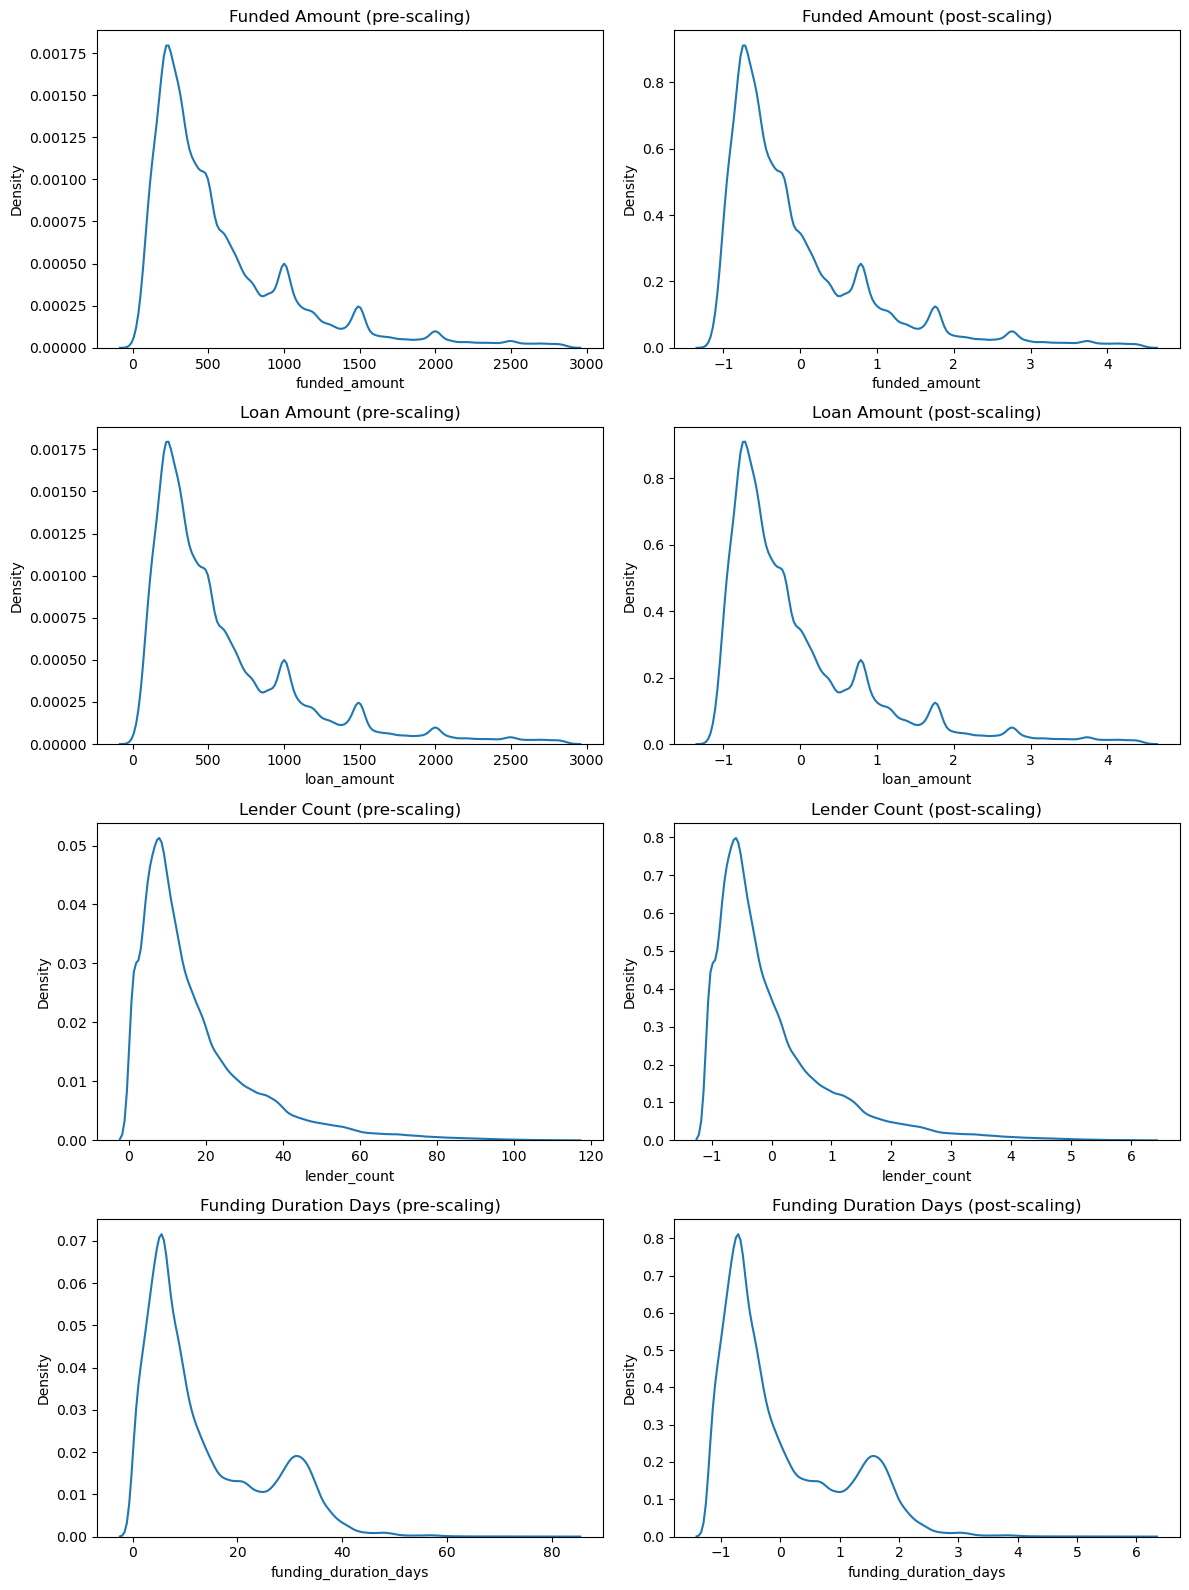

In [55]:
# A check of the data pre & post scaling
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

# Funded Amount (pre-scaling)
sns.kdeplot(data=data_to_cluster, x="funded_amount", ax=axes[0, 0])
axes[0, 0].set_title("Funded Amount (pre-scaling)")

# Loan Amount (pre-scaling)
sns.kdeplot(data=data_to_cluster, x="loan_amount", ax=axes[1, 0])
axes[1, 0].set_title("Loan Amount (pre-scaling)")

# Lender Count (pre-scaling)
sns.kdeplot(data=data_to_cluster, x="lender_count", ax=axes[2, 0])
axes[2, 0].set_title("Lender Count (pre-scaling)")

# Funding Duration Days (pre-scaling)
sns.kdeplot(data=data_to_cluster, x="funding_duration_days", ax=axes[3, 0])
axes[3, 0].set_title("Funding Duration Days (pre-scaling)")

# Convert scaled data to dataframe
scaled_data = pd.DataFrame(data_to_cluster_scaled, columns=data_to_cluster.columns)

# Funded Amount (post-scaling)
sns.kdeplot(data=scaled_data, x="funded_amount", ax=axes[0, 1])
axes[0, 1].set_title("Funded Amount (post-scaling)")

# Loan Amount (post-scaling)
sns.kdeplot(data=scaled_data, x="loan_amount", ax=axes[1, 1])
axes[1, 1].set_title("Loan Amount (post-scaling)")

# Lender Count (post-scaling)
sns.kdeplot(data=scaled_data, x="lender_count", ax=axes[2, 1])
axes[2, 1].set_title("Lender Count (post-scaling)")

# Funding Duration Days (post-scaling)
sns.kdeplot(data=scaled_data, x="funding_duration_days", ax=axes[3, 1])
axes[3, 1].set_title("Funding Duration Days (post-scaling)")

plt.tight_layout()
plt.show()

EXPLANATION OF THE ABOVE: This method ^^^ subtracts the mean from each value and divides by the standard deviation, resulting in data with a mean of 0 and a standard deviation of 1. The purpose of this transformation is often to prepare data for algorithms that are sensitive to scale, such as clustering analyses or machine learning models.

In [56]:
# Overview of different activity-variables
loans.activity.value_counts()

activity
Farming                      63049
General Store                56038
Pigs                         25411
Personal Housing Expenses    23929
Food Production/Sales        21303
                             ...  
Event Planning                   5
Celebrations                     5
Technology                       4
Adult Care                       2
Energy                           2
Name: count, Length: 163, dtype: int64

### PCA

In [57]:
pca = PCA()
data_scaled_pca = pca.fit_transform(data_to_cluster_scaled)

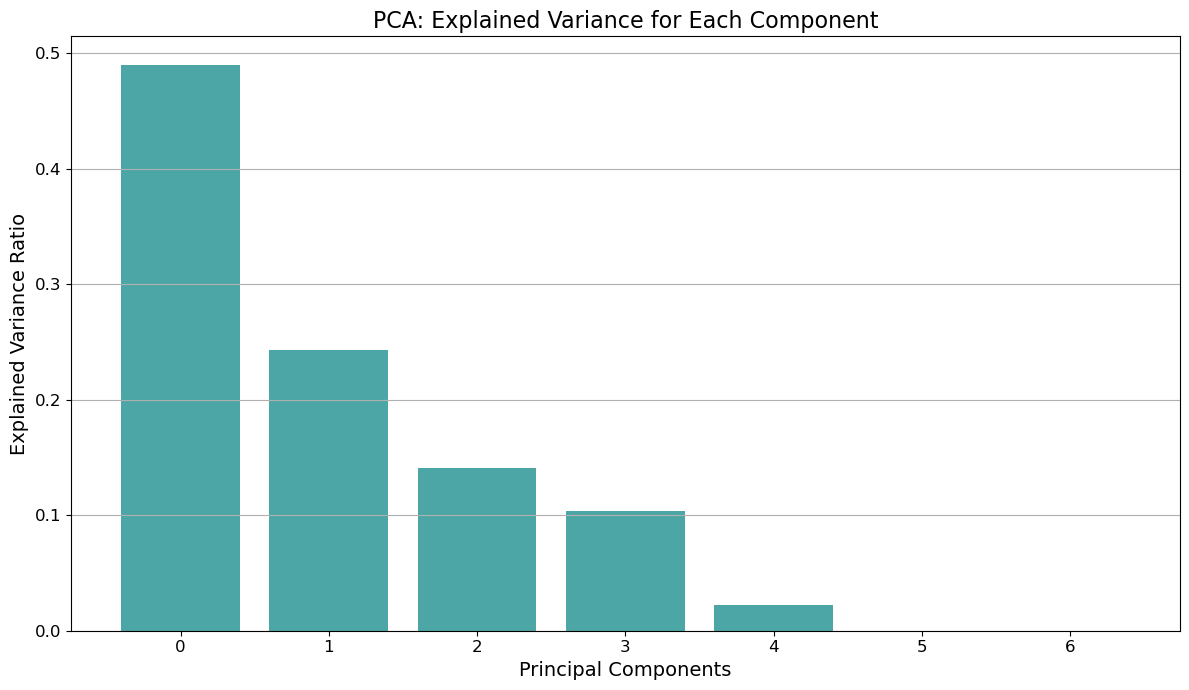

In [58]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(12,7))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, align='center', color='teal')
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.xlabel('Principal Components', fontsize=14)
plt.title('PCA: Explained Variance for Each Component', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

From above we can see that 3 components covers a large amount of the total dataset in connection with different component variances

In [59]:
# We set pca as variable & select 3 as n_components, because it makes it possible to create both 2D & 3D visuliastions -
# it eliminates the dimension-issue (3) & keeps the needed info & reduces noise
pca = PCA(n_components=4)
data_scaled_pca = pca.fit_transform(data_to_cluster_scaled)

In [60]:
pca.components_.shape

(4, 7)

In [61]:
# We check the variance now to see how much we keep with 3 components:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):f}")

Explained variance ratio: [0.48994975 0.24319518 0.14114641 0.10331804]
Total explained variance: 0.977609


THE COMMAND ABOVE EXPLAINS HOW MUCH OF THE DATA WE HAVE LOST = Aprox. 13%

The explained_variance_ratio_ attribute of the PCA object shows how much variance is captured by each of the principal components.

<Axes: >

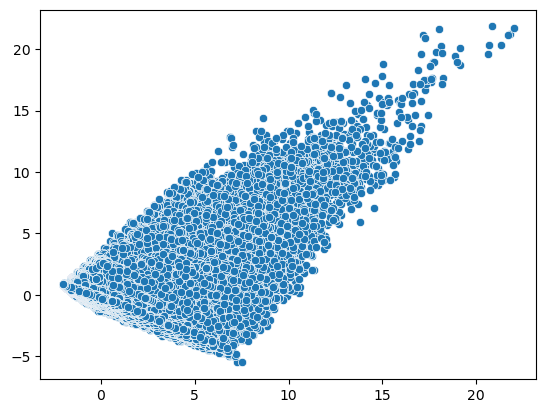

In [62]:
# Plot of the reduced data:
sns.scatterplot(x=data_scaled_pca[:,0], y=data_scaled_pca[:,1])

Above we can see, that it's likely there is some natural clusters (maybe loan_amount & lender_count?)

<Axes: >

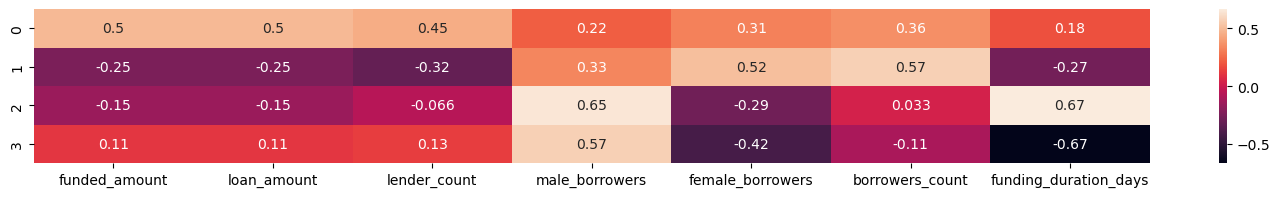

In [63]:
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame(pca.components_, columns=data_to_cluster.columns), annot=True)

### NMF

In [64]:
# lib import NMF
from sklearn.decomposition import NMF

In [65]:
# Set NMF with 4 components
nmf = NMF(n_components=4)

In [66]:
# With NMF we will use min-max scaled data
data_reduced_nmf = nmf.fit_transform(data_to_cluster_minmax)

In [67]:
data_reduced_nmf.shape

(550998, 4)

In [68]:
nmf.components_.shape

(4, 7)

<Axes: >

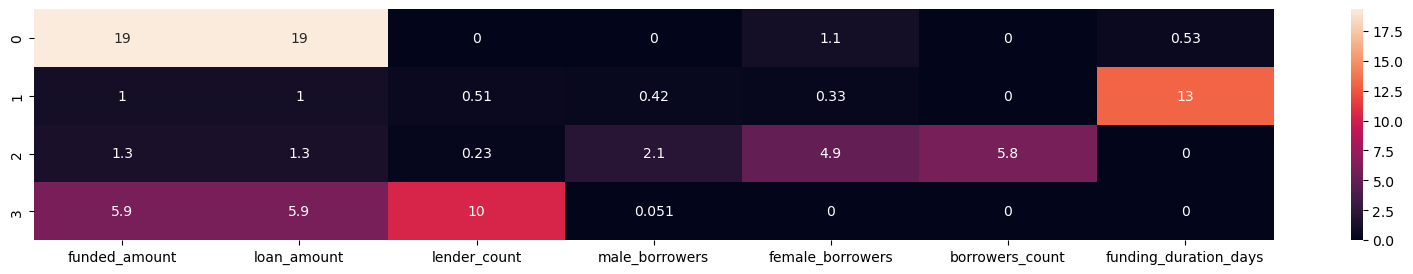

In [69]:
plt.figure(figsize=(20,3))
sns.heatmap(pd.DataFrame(nmf.components_, columns=data_to_cluster.columns), annot=True)

<Axes: >

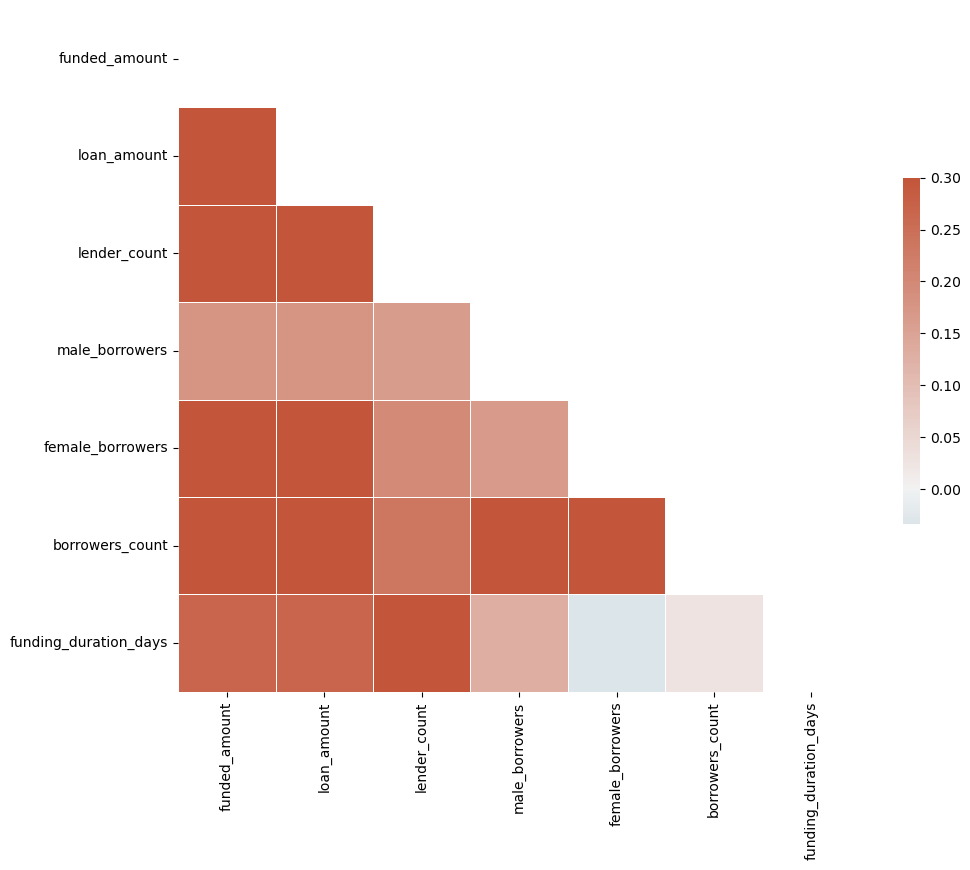

In [70]:
#quick correlation check

# Compute the correlation matrix
corr = data_to_cluster.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### UMAP

In [71]:
# We can specify multiple dimensions and other parameters with umap
umap_scaler = umap.UMAP()

In [72]:
# umap will not run if we don't take an sample, because of the wide spread due to loan/funded amount
sample_size = 5000
sample_indices = np.random.choice(data_to_cluster_scaled.shape[0], sample_size, replace=False)
sample_data = data_to_cluster_scaled[sample_indices]

# With umap we can use the now sampled scaled data
embeddings = umap_scaler.fit_transform(sample_data)

<Axes: >

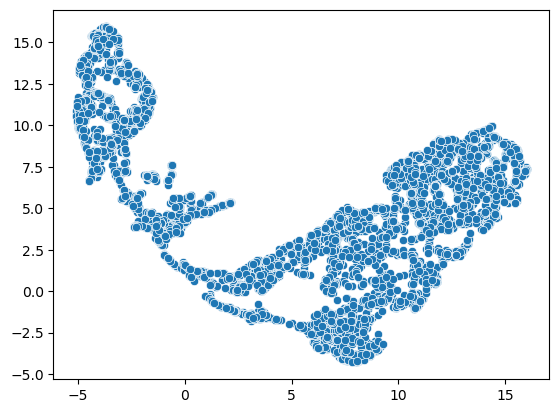

In [73]:
# UMAP plot
sns.scatterplot(x=embeddings[:,0], y=embeddings[:,1])

In [74]:
# construct a new df from the embeddings
vis_data = pd.DataFrame(embeddings)
vis_data['sector'] = loans['sector'].iloc[sample_indices].values
vis_data['country'] = loans['country'].iloc[sample_indices].values
vis_data['activity'] = loans['activity'].iloc[sample_indices].values

# cluster & prepare for color
clusterer = KMeans(n_clusters=4)
vis_data['cluster'] = clusterer.fit_predict(sample_data)  # Tildel klyngeetiketter

# rename for matching
vis_data.columns = ['x', 'y', 'sector', 'country', 'activity', 'cluster']

# create an interactive scatter plot using altair with colors
chart = alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['sector', 'country', 'activity'],  # info when hovering mouse
    color=alt.Color('cluster:N', scale=alt.Scale(scheme='dark2'))
).interactive()

chart

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

## PCA Clustering

Please note, that this above is based on 2D

In [75]:
max_iters=100
k = 4

In [76]:
#centroids
centroids = data_scaled_pca[np.random.choice(data_scaled_pca.shape[0], k, replace=False)]

In [77]:
# lets assign the closest data point to each of it's closest centroid
distances = np.linalg.norm(data_scaled_pca - centroids[:, np.newaxis], axis=2)
labels = np.argmin(distances, axis=0)

# then we recompute the centroids:
new_centroids = np.array([data_scaled_pca[labels == i].mean(axis=0) for i in range(k)])

np.set_printoptions(suppress=True, precision=5) # we need this to prevent e-01.. etc. when printing
print(new_centroids)

[[-1.44279  0.62027 -0.34653  0.28284]
 [ 0.99902 -0.58931  0.63323 -0.4618 ]
 [-1.2609   0.61017  0.02878 -0.13798]
 [ 0.08393  0.12632 -0.55427  0.42835]]


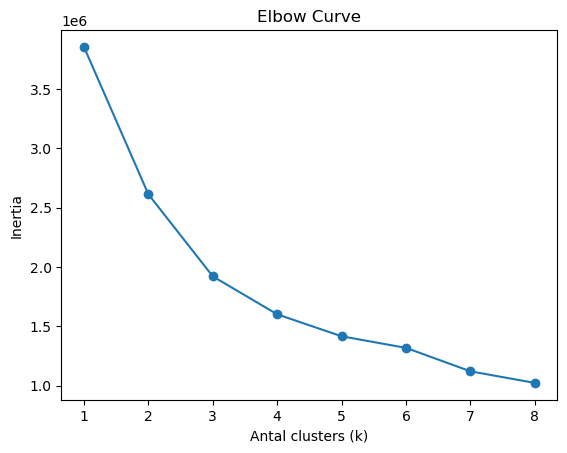

In [78]:
# Find the optimal amount of clusters using the elbow-method (checking 1-8)
inertias = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_to_cluster_scaled)
    inertias.append(kmeans.inertia_)

# lets show the elbow curve plot
plt.plot(range(1, 9), inertias, marker='o')
plt.xlabel('Antal clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

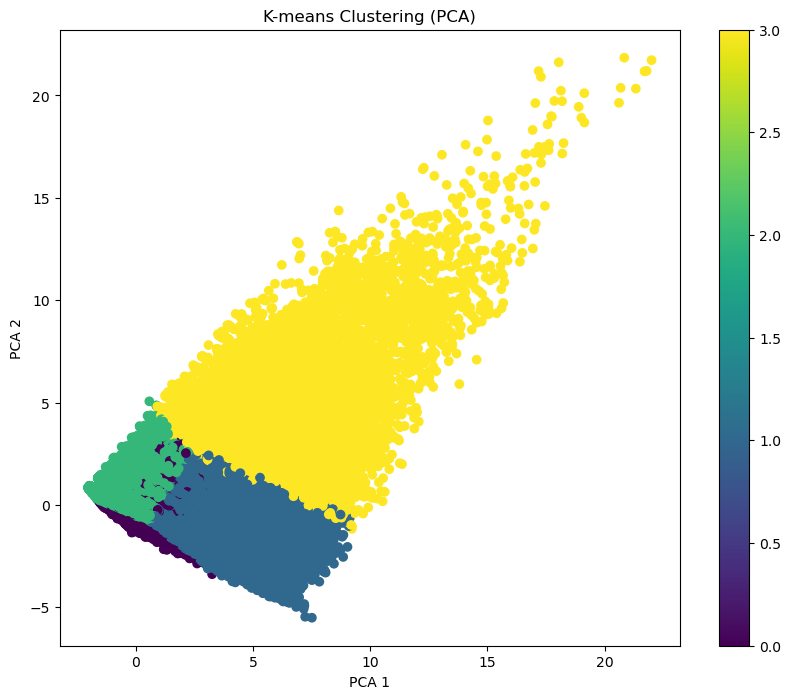

In [79]:
# Select optimal k (for this, we select 4, since the difference between 4-5 is small, and 3-4 is a bit bigger)
optimal_k = 4

# K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_to_cluster_scaled)

# visualize K-means results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_scaled_pca[:, 0], data_scaled_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter)
plt.show()

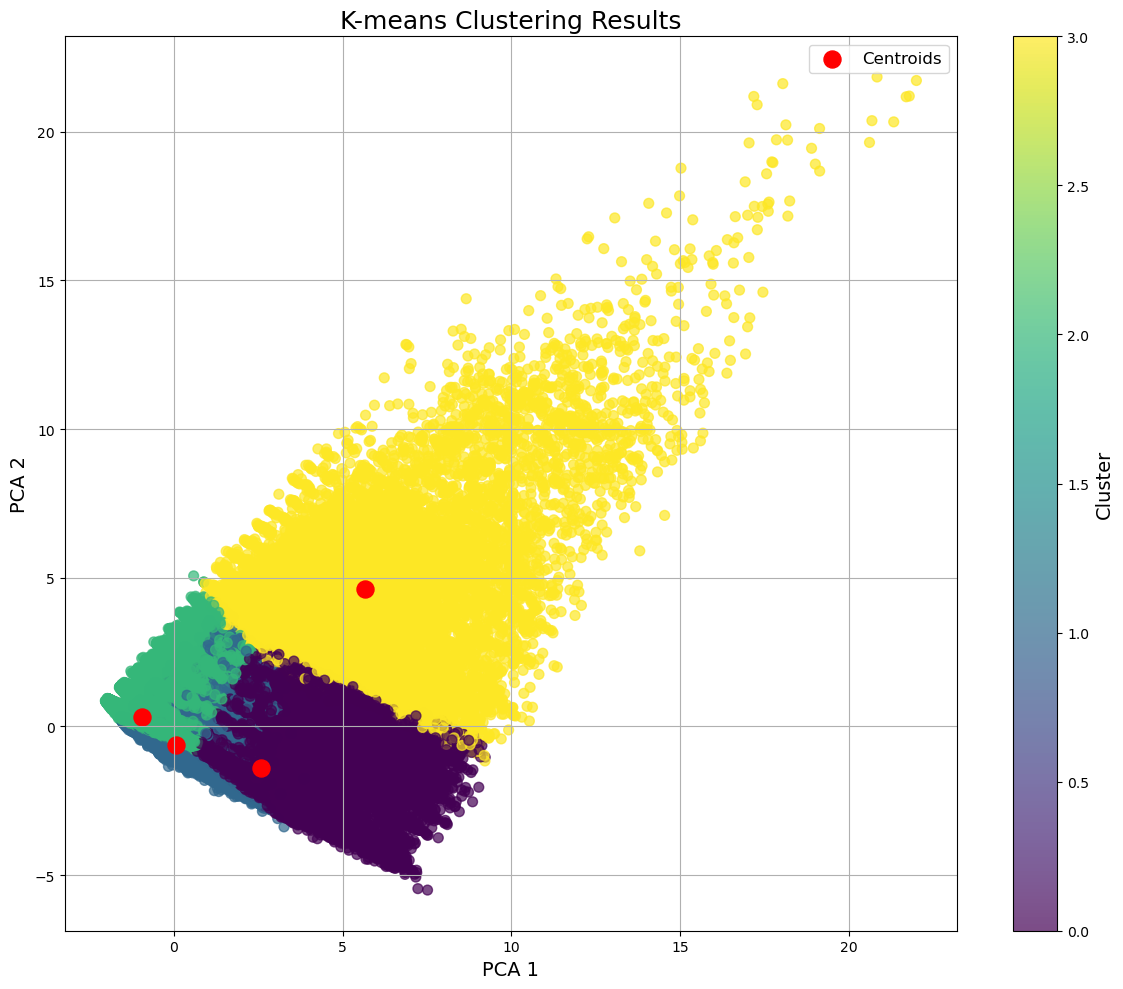

In [80]:
# select optimal k (for this, we select 4, since the difference between 4-5 is small, and 3-4 is a bit bigger)
optimal_k = 4

# perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=7)
kmeans_labels = kmeans.fit_predict(data_to_cluster_scaled)

# visualize K-means results
plt.figure(figsize=(12, 10))

# create a scatter plot with colors
scatter = plt.scatter(data_scaled_pca[:, 0], data_scaled_pca[:, 1],
                      c=kmeans_labels,
                      cmap='viridis',
                      s=50,  # Increase point size
                      alpha=0.7)  # Add some transparency

plt.title('K-means Clustering Results', fontsize=18)
plt.xlabel('PCA 1', fontsize=14)
plt.ylabel('PCA 2', fontsize=14)

# add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster', fontsize=14)

# add cluster centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='red',
            marker='o', # circle marker centroids
            s=150,  # increase size of centroids
            label='Centroids')

# legend
plt.legend(fontsize=12)

plt.grid(True) # enable grid for reading
plt.tight_layout()
plt.show()

## Hierarchical clustering

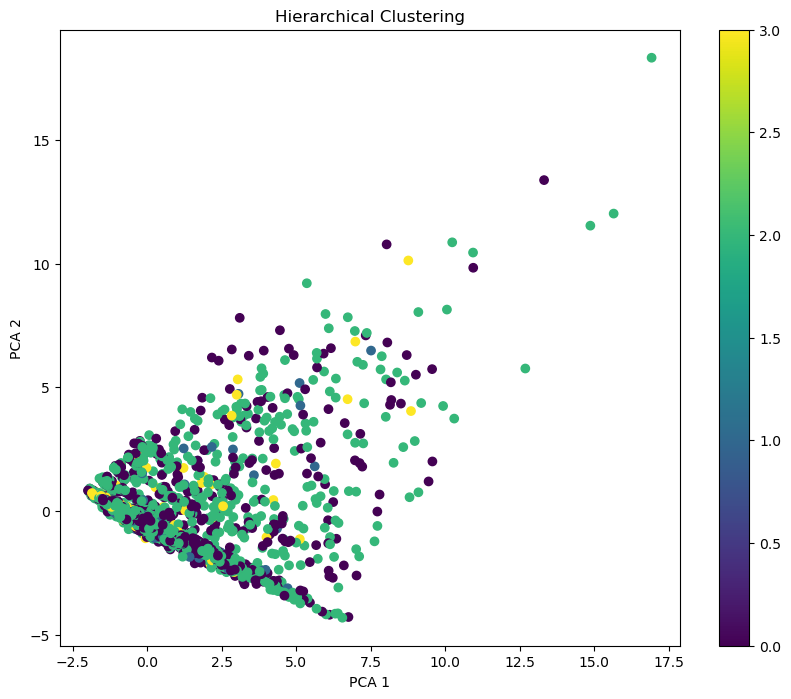

In [81]:
# we need to make a sample of pca like we did with the dataset, otherwise the session will crash
sample_size = 5000
sample_indices = np.random.choice(data_scaled_pca.shape[0], sample_size, replace=False)
sample_pca = data_scaled_pca[sample_indices]

#scaled data was defined earlier, but lets add _scaled
sample_data_scaled = sample_data

# hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(sample_data)

# hierarchical clustering results - visualisation
plt.figure(figsize=(10, 8))
scatter = plt.scatter(sample_pca[:, 0], sample_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter)
plt.show()

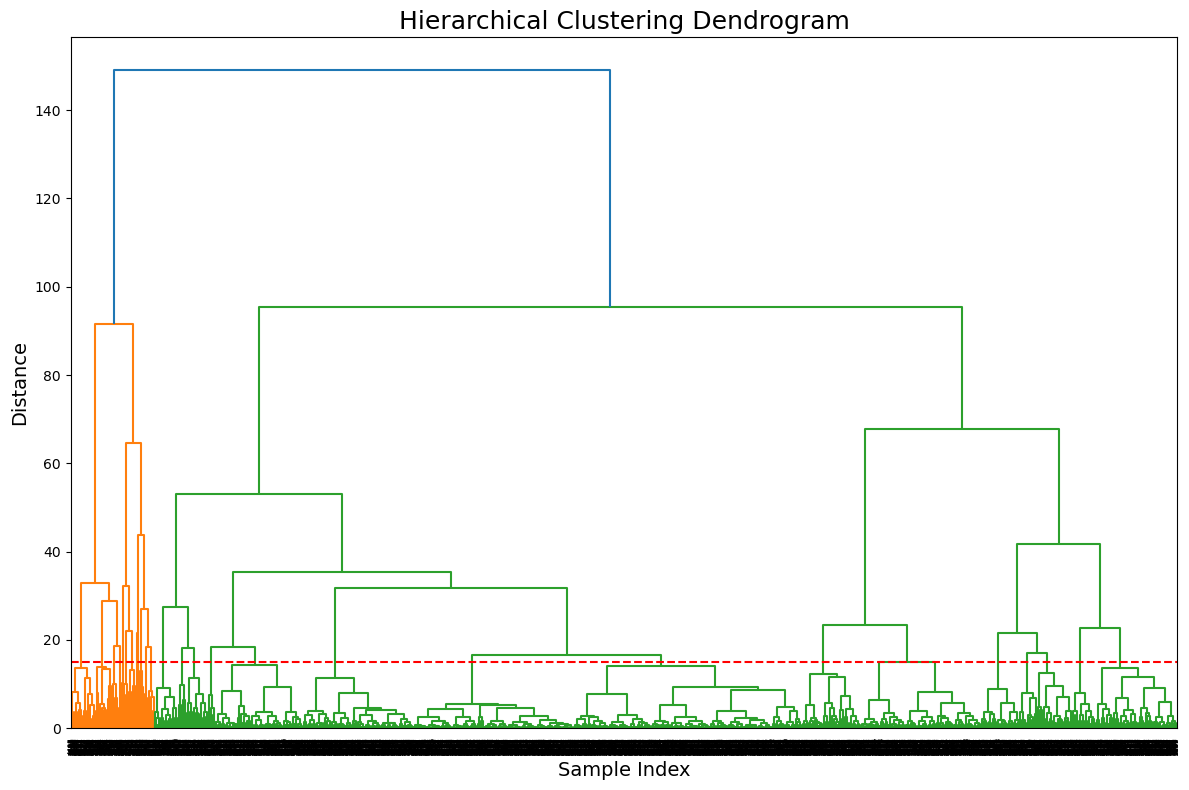

Unique clusters: [1 2 3 4]
Number of samples in each cluster: [   0  232  147 2929 1692]


In [82]:
# hierarchical clustering
linkage_matrix = linkage(sample_data_scaled, method='ward')

# plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)

plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Distance', fontsize=14)

# cutting line
plt.axhline(y=15, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# clusters based on dendrogram
from scipy.cluster.hierarchy import fcluster

# cluster count - 4 as selected in kmeans
n_clusters = 4

# cluster labels here & numbers:
cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

print(f"Unique clusters: {np.unique(cluster_labels)}")
print(f"Number of samples in each cluster: {np.bincount(cluster_labels)}")

In [83]:
# download & import gradio
!pip install gradio -q
import gradio as gr

In [84]:
# recommender loan function
def create_loan_recommender(loans):
    # combine relevant features
    loans.loc[:, 'combined_features'] = loans[['sector', 'country', 'activity']].agg(' '.join, axis=1)

    # use TF-IDF to textbased features
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(loans['combined_features'])

    # normalize funding duration
    scaler = MinMaxScaler() 
    funding_duration_normalized = scaler.fit_transform(loans[['funding_duration_days']])

    # combine TF-IDF matrix with duration
    feature_matrix = np.hstack((tfidf_matrix.toarray(), funding_duration_normalized))

    return tfidf, scaler, feature_matrix

def predict_loan_amount(sector, country, activity, funding_duration_days, loans, tfidf, scaler, feature_matrix, n=5):
    input_features = f"{sector} {country} {activity}"
    input_tfidf = tfidf.transform([input_features])
    input_duration = scaler.transform([[funding_duration_days]])

    # combine input features
    input_combined = np.hstack((input_tfidf.toarray(), input_duration))

    # calculate cosine similarity between input and exisiting data
    sim_scores = cosine_similarity(input_combined, feature_matrix)[0]

    # find the loans that are closest to the inputted
    similar_indices = sim_scores.argsort()[::-1][:n]
    similar_loans = loans.iloc[similar_indices]

    # predict loan amount based on similair loans
    predicted_loan_amount = similar_loans['loan_amount'].mean()

    return predicted_loan_amount, similar_loans[['sector', 'country', 'activity', 'loan_amount', 'funding_duration_days']]

# create recommender
tfidf, scaler, feature_matrix = create_loan_recommender(loans)

# defination of the gradio interface
def recommend_loan(sector, country, activity, funding_duration_days):
    predicted_amount, similar_loans = predict_loan_amount(sector, country, activity, funding_duration_days, loans, tfidf, scaler, feature_matrix)
    return f"Predicted Loan Amount: {predicted_amount}", similar_loans

/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykernel_32414/3026099292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans.loc[:, 'combined_features'] = loans[['sector', 'country', 'activity']].agg(' '.join, axis=1)


In [85]:
# create a unique list of countries and sectors
unique_sectors = loans['sector'].unique().tolist()
unique_countries = loans['country'].unique().tolist()

# setting gradio interface
interface = gr.Interface(
    fn=recommend_loan,
    inputs=[
        gr.Dropdown(choices=unique_sectors, label="Sector"),  # Dropdown for sector
        gr.Dropdown(choices=unique_countries, label="Country"),  # Dropdown for country
        gr.Textbox(label="Activity"),
        gr.Number(label="Funding Duration (Days) - refers to the estimated time it takes to get the loan funded.")
    ],
    outputs=["text", "dataframe"],
    title="Loan Amount Predictor",
    description="Input sector, country, activity, and funding duration to predict loan amount and see similar loans.",
)

# start gradio app
interface.launch()

OSError: [Errno 30] Read-only file system: 'flagged'

# Section 7: SML

In [80]:
# Libs needed for section 7 (some already imported)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer

# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

#  Model selection & Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score

# pipeline for the different models
from sklearn.pipeline import Pipeline

# decision Tree
from sklearn.tree import DecisionTreeRegressor

# tabular data explanation with LIME
import lime.lime_tabular  

# install shap & import
!pip install lime shap pdpbox -qqq
import shap

In [ ]:
# it's a good idea to check the correlation matrix, to check if relevant columns may correlate to much with others
numeric_columns = loans.select_dtypes(include=[np.number]).columns

# Beregn korrelationsmatrix
corr_matrix = loans[numeric_columns].corr()

# Plot korrelationsmatrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix for Numeric Columns in Loans Dataset')
plt.tight_layout()
plt.show()

In [82]:
relevant_columns = [
    'loan_amount',
    'activity',
    'sector',
    'country',
    'region',
    'posted_time',
    'funded_time',
    'borrowers_count',
    'gender_class',
    'funding_duration_days',
    'term_in_months',
]


In [83]:
loans_df = loans[relevant_columns]

In [ ]:
# We want to check if the average loan is somewhat consistent through out the timeperiod. 
# Create a new column for year-month (YYYY-MM format)
loans['year_month'] = loans['posted_time'].dt.to_period('M')

# Group by year-month and calculate the mean loan_amount
monthly_avg_loan = loans.groupby('year_month')['loan_amount'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
monthly_avg_loan.plot(kind='bar', color='skyblue')
plt.title('Average Loan Amount per Month')
plt.xlabel('Month')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### SAMLPING LOANS:

In [85]:
loans_df = loans_df.sample(n=30000, random_state=1)

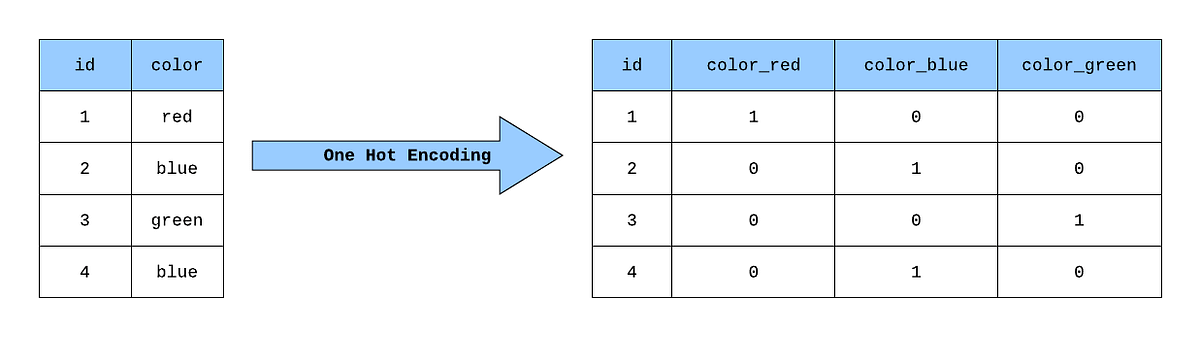

In [86]:
# Define the target variable 'y' (loan_amount)
y = loans_df['loan_amount']

# Define the feature set 'X' (all other columns except loan_amount)
X = loans_df[['activity', 'sector', 'country', 'borrowers_count', 'funding_duration_days', 'region', 'gender_class', 'term_in_months']]

# Preprocessing for numeric features
numeric_features = ['borrowers_count', 'funding_duration_days', 'term_in_months']
numeric_transformer = StandardScaler()

# Preprocessing for categorical features
categorical_features = ['activity', 'sector', 'country', 'region', 'gender_class']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [ ]:
y_train

In [ ]:
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
# Plotting Utilities
import matplotlib.gridspec as gridspec
import itertools  # For creating iterator over grid positions

# Note: We are using only two features for plotting decision boundaries
X_train_ml = X_train[['borrowers_count', 'term_in_months']].values  # Two features from training data
y_train_ml = y_train.astype(int).values  # Target values

# Initialize a variety of models
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = DecisionTreeRegressor()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1, 1, 1])  # Ensemble Voting Classifier

# Set up the plot grid layout and figure
value = 1.5
width = 0.75
gs = gridspec.GridSpec(2, 2)  # 2x2 grid for subplots
fig = plt.figure(figsize=(10, 8))  # Figure size

# Labels for the models
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']

# Loop over models and create decision region plots
for clf, lab, grd in zip([clf1, clf2, clf3, eclf], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_ml, y_train_ml)  # Train the model
    ax = plt.subplot(gs[grd[0], grd[1]])  # Place the subplot in the grid
    fig = plot_decision_regions(X=X_train_ml, y=y_train_ml, clf=clf)  # Plot decision regions
    plt.title(lab)  # Set the title for each subplot

# Show the plot
plt.tight_layout()
plt.show()

In [87]:
# Pipeline for Linear Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Pipeline for Decision Tree Regression
pipeline_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Pipeline for Random Forest Regression
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [ ]:
############################################################
# Train Linear Regression
pipeline_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Train & test score
train_score_lr = pipeline_lr.score(X_train, y_train)
test_score_lr = pipeline_lr.score(X_test, y_test)

print("Linear Regression Performance:")
print(f"  MSE: {mse_lr:.4f}")
print(f"  MAE: {mae_lr:.4f}")
print(f"  R²: {r2_lr:.4f}")
print(f"Train Score: {train_score_lr:.4f}")
print(f"Test Score: {test_score_lr:.4f}")

############################################################
# Train Decision Tree Regression
pipeline_tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = pipeline_tree.predict(X_test)

# Evaluate
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Train & test score
train_score_tree = pipeline_tree.score(X_train, y_train)
test_score_tree = pipeline_tree.score(X_test, y_test)

print("\nDecision Tree Regression Performance:")
print(f"  MSE: {mse_tree:.4f}")
print(f"  MAE: {mae_tree:.4f}")
print(f"  R²: {r2_tree:.4f}")
print(f"Train Score: {train_score_tree:.4f}")
print(f"Test Score: {test_score_tree:.4f}")

############################################################
# Train Random Forest Regression
pipeline_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Train & test score
train_score_rf = pipeline_rf.score(X_train, y_train)
test_score_rf = pipeline_rf.score(X_test, y_test)

print("\nRandom Forest Regression Performance:")
print(f"  MSE: {mse_rf:.4f}")
print(f"  MAE: {mae_rf:.4f}")
print(f"  R²: {r2_rf:.4f}")
print(f"Train Score: {train_score_rf:.4f}")
print(f"Test Score: {test_score_rf:.4f}")

############################################################

## HYPERPARAMETER TUNING IS NEEDED! - No need for crossvalidation for now...
The models besides Linear Regression know the dataset a little to well = overfitting due to Train score being close to 1.00 
 + (and) the gap between Train Score & Test Score is to large.  

In [ ]:
# HYPERPARAMETER TUNING IS NEEDED!! - No need for crossvalidation for now
# HYPERPARAMETER TUNING FOR DECISION TREE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Define the hyperparameter space for randomized search
param_distributions = {
    'regressor__max_depth': np.arange(2, 51),  # testing depth from 2 to 50
    'regressor__min_samples_split': np.arange(2, 11),  # testing samples split 2 to 10
    'regressor__min_samples_leaf': np.arange(2, 11),  # test leaf 2 to 10
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=pipeline_tree, param_distributions=param_distributions,
                                   n_iter=20, cv=5, n_jobs=-1, scoring='r2', verbose=2, random_state=69)

# Perform randomized search on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and R^2 score
print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best cross-validation R^2 score: {random_search.best_score_}")

# Use the best model for predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTest set performance:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

print(f"Best hyperparameters: {random_search.best_params_}")

Grid Search evaluates 10 hyperparameter combinations for Random Forest.
5-fold cross-validation applied, totaling 50 model fits (10 x 5).
Hyperparameters tested: max_depth, min_samples_leaf, min_samples_split, n_estimators.
Each line shows one fit with specific hyperparameter values.
the goal is to identify the optimal hyperparameter set based on cross-validation performance.

In [ ]:
# RANDOM FORREST TREE - HYPERPARAMETER TUNING
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
 
# Define the hyperparameter space for randomized search
param_distributions = {
    'regressor__n_estimators': np.arange(100, 201, 10),  # Randomly search between 100 and 200 trees
    'regressor__max_depth': np.arange(10, 51, 10),  # Randomly search between 10 and 50 for depth
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 3, 5]
}
 
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=pipeline_rf, param_distributions=param_distributions,
                                   n_iter=10, cv=5, n_jobs=-1, scoring='r2', verbose=2, random_state=69)
 
# Perform randomized search on the training data
random_search.fit(X_train, y_train)
 
# Print the best hyperparameters and R^2 score
print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best cross-validation R^2 score: {random_search.best_score_}")

In [91]:
# Pipeline for Linear Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Pipeline for Decision Tree Regression
pipeline_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(min_samples_split=4, 
                                        min_samples_leaf= 6, 
                                        max_features= None, 
                                        max_depth=34, 
                                        criterion= 'poisson'))
])

# Pipeline for Random Forest Regression
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=150, 
                                        min_samples_split=10, 
                                        min_samples_leaf=3, 
                                        max_depth=40))
])

## Cross Validation with hyperparameters

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline_tree, X_train, y_train, cv=5, scoring='r2')

# Train the model on the full training set
pipeline_tree.fit(X_train, y_train)

# Evaluate the model on training and test data
train_score_tree = pipeline_tree.score(X_train, y_train)
test_score_tree = pipeline_tree.score(X_test, y_test)

# Calculate MSE and RMSE
y_pred_tree = pipeline_tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

# Print cross-validation scores and the final evaluation
print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R^2: {cv_scores.mean()}")
print(f'Decision Tree - Training R^2 score: {train_score_tree}')
print(f'Decision Tree - Test R^2 score: {test_score_tree}')
print(f'Decision Tree - Test MSE: {mse_tree}')
print(f'Decision Tree - Test RMSE: {rmse_tree}')

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring='r2')

# Train the model on the full training set
pipeline_rf.fit(X_train, y_train)

# Evaluate the model on training and test data
train_score_rf = pipeline_rf.score(X_train, y_train)
test_score_rf = pipeline_rf.score(X_test, y_test)

# Calculate MSE and RMSE
y_pred_rf = pipeline_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Print cross-validation scores and the final evaluation
print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R^2: {cv_scores.mean()}")
print(f'Random Forest - Training R^2 score: {train_score_rf}')
print(f'Random Forest - Test R^2 score: {test_score_rf}')
print(f'Random Forest - Test MSE: {mse_rf}')
print(f'Random Forest - Test RMSE: {rmse_rf}')

### Random Forrest model is selected - since it has the lowest MSE & RMSE = better predictions

In [ ]:
print(pipeline_rf.named_steps)

In [ ]:
# Get feature importance from the random forest model
feature_importances = pipeline_rf.named_steps['regressor'].feature_importances_

# Get the feature names after transformation
# The get_feature_names_out() method from the ColumnTransformer gives the transformed feature names
feature_names = preprocessor.get_feature_names_out() # 

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # To display the highest importance on top
plt.show()

----------------------------------------------------------------------------------------------

In [ ]:
# We have a lot of onehot encoded data, hence we need to look at the top results
# HERE, WE Limit to the top N most important features
top_n = 50
top_features_df = features_df.head(top_n)

# Plot the top N feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Random Forest Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance on top
plt.show()

### RESIDUAL PLOT

Helps to check if the residuals (errors) has been randomly distributed - which tells us if the model fits well.

In [ ]:
# Residual plot (errors)
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Loan Amount')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Cross-validation Visualization
we use it to check out how well cross-validation works, you can use a boxplot to see how the r² scores are spread out across the folds.

In [ ]:
# plot for cross-validation R**2 scores
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores, vert=False)
plt.title('Cross-Validation R² Scores')
plt.xlabel('R²')
plt.show()

this boxplot shows how well we perform in a cross-validation test where we try to predict loans. the model perform quite consistently, as the results are close to each other, with r² values between 0.596 and 0.606. this means that we explain about 60% of the variation in the loans using the model. 

## Explainability (SHAP)

In [ ]:
!pip install shap
import shap

In [ ]:
# sample a portion of the set
sample_size = 100  # adjusted sample size to 100
X_test_sample = X_test.sample(n=sample_size, random_state=42)

# transform the sampled data
X_test_sample_preprocessed = pipeline_rf.named_steps['preprocessor'].transform(X_test_sample)

# convert to dense format if needed
if not isinstance(X_test_sample_preprocessed, np.ndarray):
    X_test_sample_preprocessed = X_test_sample_preprocessed.toarray()

# initialize the SHAP explainer
explainer = shap.TreeExplainer(pipeline_rf.named_steps['regressor'])

# calculate SHAP values for the sampled data
shap_values = explainer.shap_values(X_test_sample_preprocessed, check_additivity=False)

# retrieve feature names
feature_names = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()

# plot feature importances
shap.summary_plot(shap_values, X_test_sample_preprocessed, feature_names=feature_names, plot_type="bar")

# plot SHAP values
shap.summary_plot(shap_values, X_test_sample_preprocessed, feature_names=feature_names)

# identify the most important feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)
most_important_feature_index = np.argmax(mean_abs_shap)
most_important_feature = feature_names[most_important_feature_index]

# plot dependence for the most important feature
shap.dependence_plot(most_important_feature, shap_values, X_test_sample_preprocessed, feature_names=feature_names)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])

Above we see the top features... but It could also be nice to get an overview of the features for each parameter (column)

In [140]:
# we need to first extract a list of column names (both num.- + categorical-columns )
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features) # onehot since we used onehotencoder
numeric_columns = numeric_features
all_feature_names = list(numeric_columns) + list(onehot_columns) # combine the lists



### Feature Selection Reflection

Based on the evaluation above - we can see, that Country Categorical Features like the Philippines and Kenya  seem to have strong contributions to the model.The feature importance chart generated from the Random Forest shows similar patterns, with key numeric and categorical features such as "num__borrowers_count" and "num__term_in_months" ranking highly.

 * Improvement?: It could have been great to make a visulization of the given features grouped together.. (Coming up...) 

 * Likely due to the Philippines being the most present country
 * More borrowers in a row = higher loans
 * Higher terms in months = higher loans
 
The conclusion - No huge surprises - the amount of features are fairly limited to create a general/narrow model
 * An improvement?: We could have focused on one country instead to go more in depth with one country?
 * Also the time aspect - since we have a dataframe that is set in a timeperiod - we could have made sure to account for inflation - which should have been for each country 
 * Limited count of features


### Dimensionality Reduction Techniques?
Since the structure of the Kiva dataset, techniques like PCA might not be the most effective approach. Highly correlated elements like funded_amount & lender_count were removed to reduce complexity. 

The performance of the models: the first models' generalization showed that they were overfitting - which resulted in refining the feature selection to prevent this, hereby tuning hyperparameters. 

## Gradio Deployment


In [ ]:
import gradio as gr

# create a dictionary mapping countries to their regions + mapping for sector and activity - creating grouptable into dictionary
country_region_map = loans.groupby('country')['region'].unique().to_dict()
sector_activity_map = loans.groupby('sector')['activity'].unique().to_dict() 

# prediction function for gradio
def predict_rf(gender_class, activity, sector, country, region, borrowers_count, funding_duration_days, term_in_months):
    # create a dictionary of input values, matching the expected column names - we select what we want to input
    input_data = {
        'gender_class': [gender_class],
        'sector': [sector],
        'activity': [activity],
        'country': [country],
        'region': [region],
        'borrowers_count': [borrowers_count],
        'funding_duration_days': [funding_duration_days],
        'term_in_months': [term_in_months]
    }
    
    # convert the input data to a pandas dataframe - prepare..
    input_df = pd.DataFrame(input_data)
    
    # use pipeline_rf - our very best random forest :) - to make a prediction for loan_amount
    prediction = pipeline_rf.predict(input_df)[0]
    
    # return the prediction (loan amount)
    return prediction

# update region dropdown based on selected country - we only want regions from the selected country
def update_region(country):
    regions = country_region_map.get(country, [])
    return gr.update(choices=list(regions))

# update activity dropdown based on selected sector - we only want already present activities from the selected sector
def update_activity(sector):
    activity = sector_activity_map.get(sector, [])
    return gr.update(choices=list(activity))

# unique values for dropdowns (+ dictionary)
unique_gender = loans['gender_class'].unique().tolist()
unique_sector = loans['sector'].unique().tolist()
unique_country = loans['country'].unique().tolist()

# create the gradio block interface
with gr.Blocks(title="Loan Amount Predictor") as app:
    gr.Markdown("# Loan Amount Predictor")
    gr.Markdown("Input the needed variables to get your estimated loan")
    # define input components
    gender_dropdown = gr.Dropdown(choices=unique_gender, label="Gender Class")
    sector_dropdown = gr.Dropdown(choices=unique_sector, label="Sector")
    activity_dropdown = gr.Dropdown(choices=[], label="Activity")
    country_dropdown = gr.Dropdown(choices=unique_country, label="Country")
    region_dropdown = gr.Dropdown(choices=[], label="Region")  # empty at first, updated based on country selection
    borrowers_slider = gr.Slider(1, 10, value=1, step=1, label="Number of Borrowers")
    funding_duration_slider = gr.Slider(0, 90, value=30, step=1, label="Funding Duration (How long will you wait for funding?)")
    term_in_months_slider = gr.Slider(1, 144, value=12, step=1, label="Term in Months") 
    # explainer for the above ^
    # step=1 = whole numbers
    # x, xx = range
    # value = xx = standard number

    # set up event listener to update region dropdown when country changes
    country_dropdown.change(fn=update_region, inputs=country_dropdown, outputs=region_dropdown)
    sector_dropdown.change(fn=update_activity, inputs=sector_dropdown, outputs=activity_dropdown)

    # add a button to submit the prediction
    submit_button = gr.Button("Submit")
    submit_button.click(fn=predict_rf, 
                        inputs=[gender_dropdown, activity_dropdown, sector_dropdown, country_dropdown, region_dropdown, borrowers_slider, funding_duration_slider, term_in_months_slider],
                        outputs=gr.Textbox(label="Predicted Loan Amount"))
    
    # define output component ^^^
    # output_textbox = gr.Textbox(label="Predicted Loan Amount")

# Launch the app
app.launch()